In [475]:
# Importaciones básicas
import numpy as np
import pandas as pd
import datetime

# Visualización de datos
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocesamiento de datos
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, RobustScaler, OneHotEncoder, OrdinalEncoder

# Modelos de machine learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, HuberRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer, mean_squared_error, r2_score

# Estadísticas y análisis
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

### IMPORTACIÓN DE LOS ARCHIVOS ###

In [476]:
cd /Users/thaisrocafull/Documents/CURSOS_I_APUNTS/data_science/PROYECTO_FINAL/SPOTIFY

/Users/thaisrocafull/Documents/CURSOS_I_APUNTS/data_science/PROYECTO_FINAL/SPOTIFY


In [477]:
df = pd.read_csv ('df_net.csv')

In [478]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4037 entries, 0 to 4036
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Gender              3987 non-null   object
 1   Country             3538 non-null   object
 2   Genres              4037 non-null   object
 3   Popularity Artist   4037 non-null   int64 
 4   Followers           4037 non-null   int64 
 5   Artist Name         4037 non-null   object
 6   Artist Song Rank    4037 non-null   int64 
 7   Track Name          4037 non-null   object
 8   Album Name          4037 non-null   object
 9   Total Album Tracks  4037 non-null   int64 
 10  Is Explicit         4037 non-null   bool  
 11  Song Duration       4037 non-null   int64 
 12  Popularity Song     4037 non-null   int64 
dtypes: bool(1), int64(6), object(6)
memory usage: 382.5+ KB


Hay dos columnas que deberé cambiar de formato antes de aplicar el preprocesado. 
- Artist Song Rank, puesto que actualmente está en formato (int64) pero debe ser tratado como una categoría al ser ordinal. Aquí simplemente se aplicará 'ordinal encoder'.
- Is Explicit, porque es un booleano de true y false, que lo convertiré en categoría para usarlo como binario numérico (true=1, false= 0).

### ANÁLISIS EXPLORATORIO DE LOS DATOS  (EDA) ###

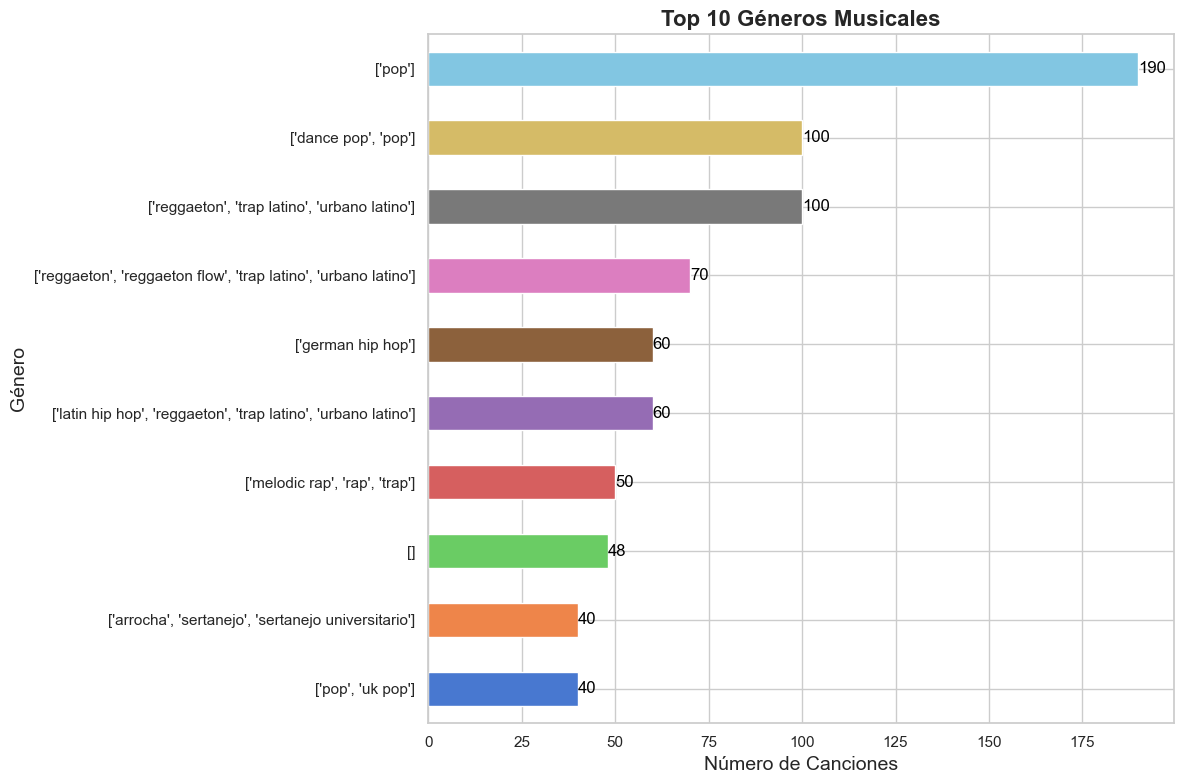

In [479]:
sns.set(style="whitegrid")

# Calcular la cuenta de géneros musicales
genre_counts = df['Genres'].value_counts().head(10)
colors = sns.color_palette("muted", len(genre_counts))
plt.figure(figsize=(12, 8))
bar_plot = genre_counts.sort_values().plot(kind='barh', color=colors)

# Estilizar el gráfico
bar_plot.set_title('Top 10 Géneros Musicales', fontsize=16, fontweight='bold')
bar_plot.set_xlabel('Número de Canciones', fontsize=14)
bar_plot.set_ylabel('Género', fontsize=14)

# Añadir etiquetas de datos a las barras
for index, value in enumerate(genre_counts.sort_values()):
    bar_plot.text(value, index, str(value), ha='left', va='center', fontsize=12, color='black')

# Ajustes adicionales para los subgráficos
plt.tight_layout()
plt.show()

Observamos que dentro de los 10 estilos musicales más escuchados en Estados Unidos, el estilo más frecuente es el **POP**, seguido por dance pop en segundo lugar, que es un subgénero dentro del pop. Luego tenemos **reguetón, trap y urbano**, que se encuentran dentro de la categoría de música latina. A continuación, está el **Hip hop**, y luego, con menos frecuencia, el **rap** y otros.

- Investigo el error del octávo género de la lista que sale [vacío].

In [480]:
top_genres = df['Genres'].value_counts().head(10).index.tolist()
print("Top 10 Géneros Musicales:")
for genre in top_genres:
    print("-", genre)

Top 10 Géneros Musicales:
- ['pop']
- ['reggaeton', 'trap latino', 'urbano latino']
- ['dance pop', 'pop']
- ['reggaeton', 'reggaeton flow', 'trap latino', 'urbano latino']
- ['latin hip hop', 'reggaeton', 'trap latino', 'urbano latino']
- ['german hip hop']
- ['melodic rap', 'rap', 'trap']
- []
- ['pop', 'uk pop']
- ['arrocha', 'sertanejo', 'sertanejo universitario']


In [481]:
# Identifico todas las filas con listas vacías en la columna 'Genres'
rows_with_empty_genre = df['Genres'].apply(lambda x: x == '[]')

# Actualizo todas esas filas con "sin clasificar"
df.loc[rows_with_empty_genre, 'Genres'] = 'sin clasificar'

En el conjunto de datos, algunas canciones no tenían información válida sobre su género musical, lo que resultaba en listas vacías en la columna 'Genres' ( [] ). Esto presentaba un inconveniente, ya que estas canciones no estaban clasificadas correctamente según su estilo musical.

He decidido sustituir las listas vacías en la columna 'Genres' con la etiqueta "Sin clasificar". 

In [482]:
# Filtro las filas que contienen 'sin clasificar' en la columna 'Genres'
uncategorized_rows = df[df['Genres'] == 'sin clasificar']
uncategorized_rows

,Gender,Country,Genres,Popularity Artist,Followers,Artist Name,Artist Song Rank,Track Name,Album Name,Total Album Tracks,Is Explicit,Song Duration,Popularity Song
660,male,DE,sin clasificar,41,16145,ZEDDY WILL,1,You,You,1,True,108923,57
661,male,DE,sin clasificar,41,16145,ZEDDY WILL,2,Confidence is Key,Confidence is Key,1,True,129647,47
662,male,DE,sin clasificar,41,16145,ZEDDY WILL,3,"Freak You ""Part 2""","Freak You ""Part 2""",1,False,79530,47
663,male,DE,sin clasificar,41,16145,ZEDDY WILL,4,Cha Cha,Cha Cha,1,True,155471,45
664,male,DE,sin clasificar,41,16145,ZEDDY WILL,5,Dont Know What To Say,Dont Know What To Say,1,True,131016,38
665,male,DE,sin clasificar,41,16145,ZEDDY WILL,6,BOP IT,BOP IT,1,True,118857,36
666,male,DE,sin clasificar,41,16145,ZEDDY WILL,7,"You - Remix feat 2Rare, Kenzo B, DJ Smallz 732","You (Remix feat 2Rare, Kenzo B, DJ Smallz 732)",1,True,158769,36
667,male,DE,sin clasificar,41,16145,ZEDDY WILL,8,Zeddy's Jam (Crank Dat 2023),Zeddy's Jam (Crank Dat 2023),1,True,117983,35
668,male,DE,sin clasificar,41,16145,ZEDDY WILL,9,Blah Blah,Blah Blah,1,True,146600,33
669,male,DE,sin clasificar,41,16145,ZEDDY WILL,10,HIT TS,HIT TS,1,True,175704,29


- Como son pocos Opto por rellenarlos manualmente una vez buscados en internet.

In [483]:
# Relleno manualmente los géneros para los 5 artistas diferentes y corrijo dos países.
df.loc[df['Artist Name'] == 'ZEDDY WILL', 'Genres'] = 'hip hop, rap'
df.loc[df['Artist Name'] == 'SNOW WIFE', 'Genres'] = 'rap, reggae fusion'
df.loc[df['Artist Name'] == 'Nyla', 'Genres'] = 'dancehall'
df.loc[df['Artist Name'] == 'Nyla', 'Country'] = 'JM'
df.loc[df['Artist Name'] == 'Descemer Bueno', 'Genres'] = 'latino, rock español' 
df.loc[df['Artist Name'] == 'WATTS', 'Genres'] = 'rock alternativo'
df.loc[df['Artist Name'] == 'WATTS', 'Country'] = 'US'

In [484]:
# Imprimo una fila por cada artista específico
artists_to_check = ['ZEDDY WILL', 'SNOW WIFE', 'Nyla', 'Descemer Bueno', 'WATTS']
filtered_rows = df[df['Artist Name'].isin(artists_to_check)].drop_duplicates('Artist Name')
print(filtered_rows[['Artist Name', 'Genres', 'Country']])

         Artist Name                Genres Country
660       ZEDDY WILL          hip hop, rap      DE
2453       SNOW WIFE    rap, reggae fusion      CA
3101            Nyla             dancehall      JM
3491  Descemer Bueno  latino, rock español      CU
4027           WATTS      rock alternativo      US


In [485]:
# Identificar todas las filas con listas vacías en la columna 'Genres'
rows_with_empty_genre = df['Genres'].apply(lambda x: x == '[]')

# Actualizar todas esas filas con "sin género"
df.loc[rows_with_empty_genre, 'Genres'] = 'sin género'

In [486]:
df['Genres'].unique()

array(["['canadian hip hop', 'canadian pop', 'hip hop', 'pop rap', 'rap']",
       "['dfw rap', 'melodic rap', 'pop', 'rap']",
       "['pop', 'singer-songwriter pop', 'uk pop']",
       "['reggaeton', 'reggaeton colombiano', 'trap latino', 'urbano latino']",
       "['reggaeton', 'trap latino', 'urbano latino']",
       "['canadian pop', 'pop']",
       "['puerto rican pop', 'reggaeton', 'trap latino', 'urbano latino']",
       "['pop']", "['pop', 'pop r&b']",
       "['latin hip hop', 'reggaeton', 'trap latino', 'urbano latino']",
       "['hip hop', 'rap', 'slap house']",
       "['canadian contemporary r&b', 'canadian pop', 'pop']",
       "['emo rap', 'miami hip hop', 'rap']", "['art pop', 'pop']",
       "['reggaeton', 'reggaeton flow', 'trap boricua', 'trap latino', 'urbano latino']",
       "['latin pop', 'reggaeton', 'reggaeton colombiano', 'trap latino', 'urbano latino']",
       "['dance pop', 'pop']", "['dance pop', 'pop', 'uk pop']",
       "['chicago rap', 'melodic rap', 

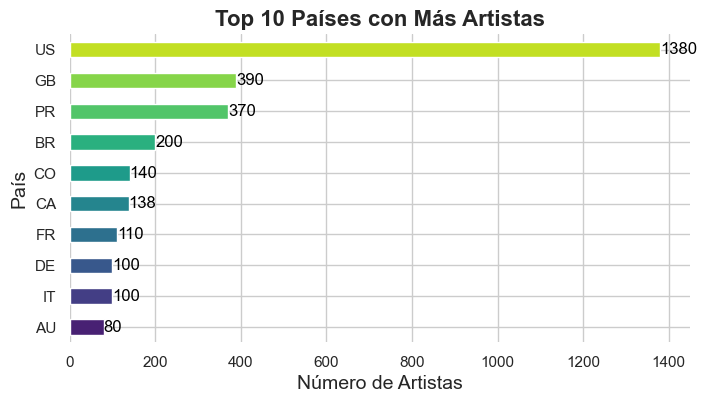

In [487]:
plt.figure(figsize=(8, 4))
# Paleta de colores
colors = sns.color_palette("viridis", 10)
# Gráfico de barras horizontal
bar_plot = df['Country'].value_counts().head(10).sort_values().plot(kind='barh', color=colors)

# Estilizar el gráfico
bar_plot.set_title('Top 10 Países con Más Artistas', fontsize=16, fontweight='bold')
bar_plot.set_xlabel('Número de Artistas', fontsize=14)
bar_plot.set_ylabel('País', fontsize=14)

# Agregar etiquetas de datos al lado de las barras
for index, value in enumerate(df['Country'].value_counts().head(10).sort_values()):
    bar_plot.text(value, index, str(value), ha='left', va='center', fontsize=12, color='black')

# Eliminar bordes innecesarios
sns.despine(left=True, bottom=True)
plt.show()


**Procedencia de los Artistas Más Reproducidos en Estados Unidos**

Estas barras representan la procedencia geográfica de los artistas más escuchados en Estados Unidos.

En primer lugar, los artistas más reproducidos son originarios de Estados Unidos, seguidos por artistas de Gran Bretaña. Puerto Rico ocupa la tercera posición, seguido por Brasil, Colombia y Canadá. Los tres últimos países en el top ten son europeos, con Francia, Alemania e Italia.

En otros encontramos un sinfín de procedencias de todo el mundo.

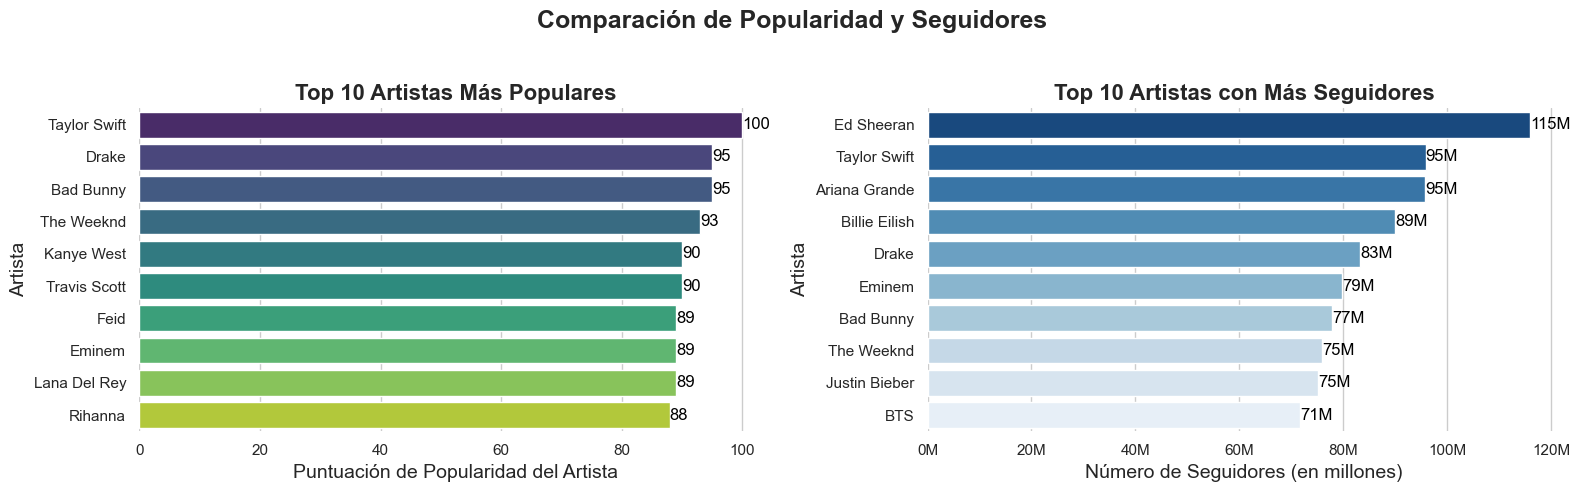

In [488]:
import warnings
warnings.filterwarnings("ignore")

sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))
colors_popularity = sns.color_palette("viridis", 10)

# Obtener las filas representativas ordenadas de mayor a menor popularidad
representative_rows = df.groupby('Artist Name', as_index=False)['Popularity Artist', 'Followers'].max()
sorted_rows_popularity = representative_rows.sort_values('Popularity Artist', ascending=False).head(10)

# Gráfico de barras horizontal para popularidad
bar_plot_popularity = sns.barplot(x='Popularity Artist', y='Artist Name', data=sorted_rows_popularity, palette=colors_popularity, ax=axes[0])

# Estilizar el gráfico de popularidad
bar_plot_popularity.set_title('Top 10 Artistas Más Populares', fontsize=16, fontweight='bold')
bar_plot_popularity.set_xlabel('Puntuación de Popularidad del Artista', fontsize=14)
bar_plot_popularity.set_ylabel('Artista', fontsize=14)

# Agregar etiquetas de datos al lado de las barras de popularidad
for index, value in enumerate(sorted_rows_popularity['Popularity Artist']):
    bar_plot_popularity.text(value, index, f'{int(value)}', ha='left', va='center', fontsize=12, color='black')

# Paleta de colores para seguidores
colors_followers = sns.color_palette("Blues_r", 10)

# Obtener las filas representativas ordenadas de mayor a menor seguidores
sorted_rows_followers = representative_rows.sort_values('Followers', ascending=False).head(10)

# Gráfico de barras horizontal para seguidores
bar_plot_followers = sns.barplot(x='Followers', y='Artist Name', data=sorted_rows_followers, palette=colors_followers, ax=axes[1])

# Estilizar el gráfico de seguidores
bar_plot_followers.set_title('Top 10 Artistas con Más Seguidores', fontsize=16, fontweight='bold')
bar_plot_followers.set_xlabel('Número de Seguidores (en millones)', fontsize=14)
bar_plot_followers.set_ylabel('Artista', fontsize=14)

# Convertir los valores del eje x a millones para seguidores
bar_plot_followers.set_xticklabels(['{:,.0f}M'.format(x/1000000) for x in bar_plot_followers.get_xticks()])

# Agregar etiquetas de datos al lado de las barras de seguidores
for index, value in enumerate(sorted_rows_followers['Followers']):
    bar_plot_followers.text(value, index, f'{int(value/1000000)}M', ha='left', va='center', fontsize=12, color='black')

# Ajustes adicionales para los subgráficos
fig.suptitle('Comparación de Popularidad y Seguidores', fontsize=18, fontweight='bold')
fig.tight_layout(rect=[0, 0, 1, 0.95])  # Ajuste del diseño

# Eliminar bordes innecesarios
sns.despine(left=True, bottom=True)
plt.show()


- La comparación entre la popularidad y la posición en el ranking de seguidores de los artistas revela que no siempre coinciden ambas métricas. Este hallazgo sugiere que un artista puede gozar de gran popularidad y tener muchos seguidores, pero no necesariamente debido a la calidad de su música.

- Tomemos el ejemplo de **Taylor Swift**, quien ocupa una posición destacada en ambos rankings dentro del top ten. Con el primer puesto en popularidad y el segundo lugar con más seguidores, Taylor Swift representa un equilibrio perfecto entre reconocimiento artístico y una base sólida de seguidores. 

- Este fenómeno se repite con otros artistas como Drake, Eminem y The Weeknd, quienes también figuran en ambos rankings top 10.

- En última instancia, este análisis subraya la diversidad de factores que contribuyen a la popularidad de un artista, y cómo la conexión entre la calidad musical y la cantidad de seguidores puede variar significativamente en el panorama musical.

- El ejemplo más extremo: **Ed Sheeran**, que, a pesar de tener tantos seguidores, no está en el top 10 de popularidad.

Es importante considerar que Ed Sheeran es inglés, y el conjunto de datos se enfoca en las preferencias de oyentes en Estados Unidos. Más adelante, exploraremos gráficas que revelarán cómo las canciones de artistas ingleses, aunque ocupen la segunda posición, experimentan un declive significativo en cuanto a la cantidad de canciones.

Otro factor a tener en cuenta podría ser la diversidad de estilos musicales que aborda Ed Sheeran, incluyendo Folk, Rhythm and Blues, y Soul, los cuales no son los géneros dominantes en Estados Unidos.



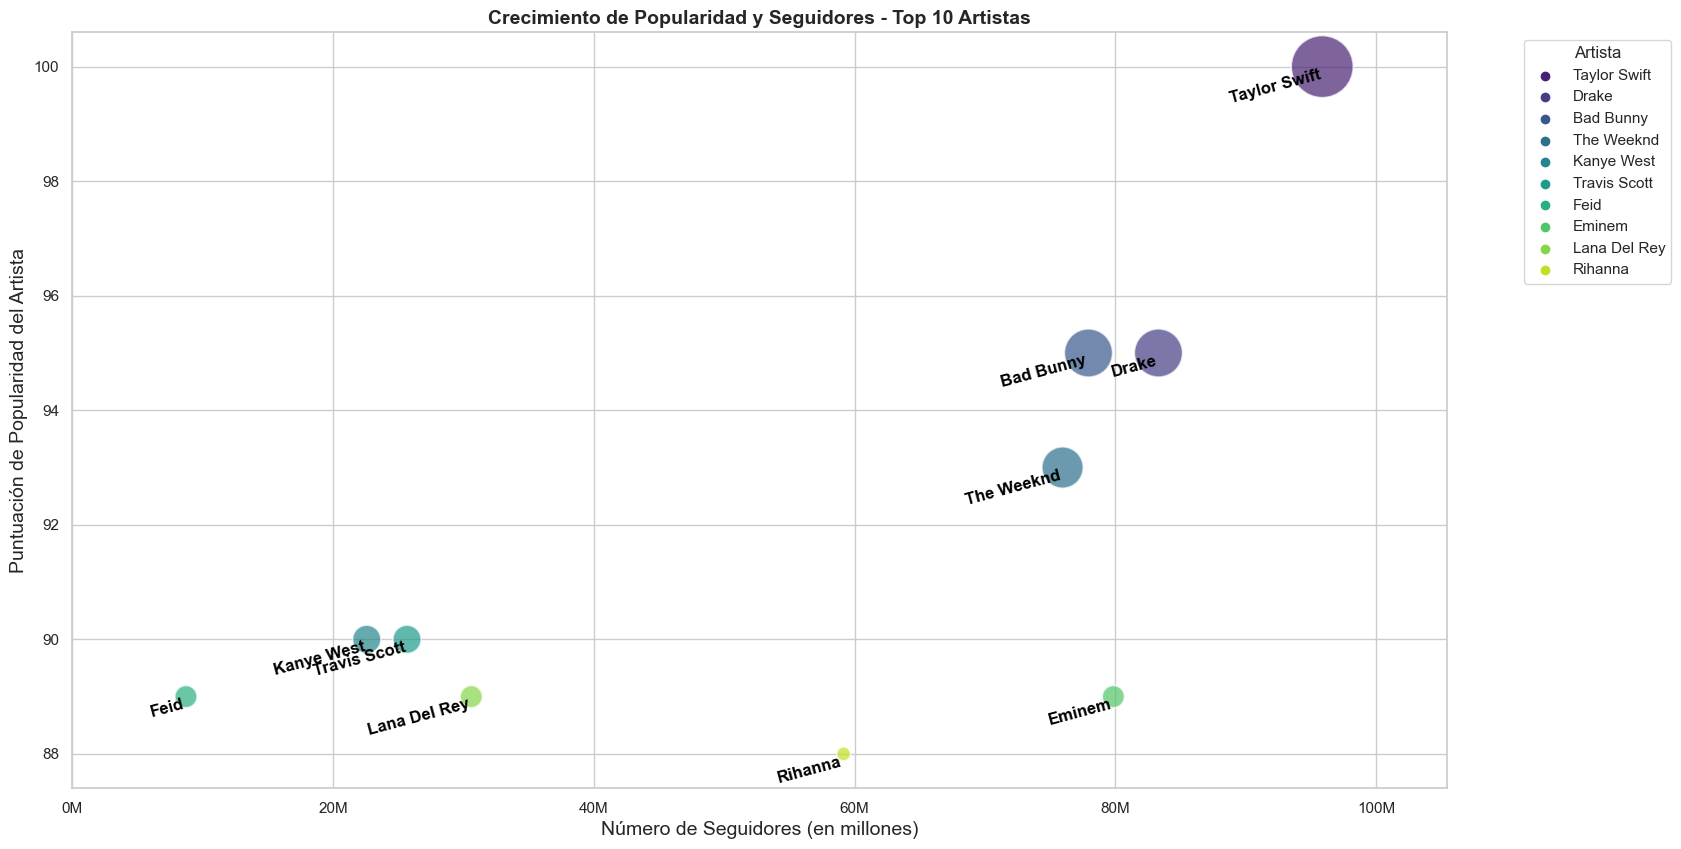

In [489]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(10, 4))

# Paleta de colores 
colors_popularity = sns.color_palette("viridis", 10)
representative_rows = df.groupby('Artist Name', as_index=False)['Popularity Artist', 'Followers'].max()

# Obtener las filas representativas ordenadas de mayor a menor popularidad y seguidores
sorted_rows_popularity = representative_rows.sort_values('Popularity Artist', ascending=False).head(10)

# Gráfico de dispersión para comparar popularidad y seguidores con puntos más transparentes
scatter_plot = sns.scatterplot(x='Followers', y='Popularity Artist', hue='Artist Name', data=sorted_rows_popularity, 
                               palette=colors_popularity, size='Popularity Artist', sizes=(100, 2000), 
                               alpha=0.7, ax=ax)

# Agregar etiquetas de datos a los puntos con nombres inclinados
for line in range(0, len(sorted_rows_popularity)):
    scatter_plot.text(sorted_rows_popularity['Followers'].iloc[line], 
                      sorted_rows_popularity['Popularity Artist'].iloc[line], 
                      sorted_rows_popularity['Artist Name'].iloc[line], 
                      horizontalalignment='right', 
                      verticalalignment='top',
                      size='medium', 
                      color='black', 
                      weight='semibold',
                      rotation=15)  

# Estilizar el gráfico de dispersión
scatter_plot.set_title('Crecimiento de Popularidad y Seguidores - Top 10 Artistas', fontsize=14, fontweight='bold')
scatter_plot.set_xlabel('Número de Seguidores (en millones)', fontsize=14)
scatter_plot.set_ylabel('Puntuación de Popularidad del Artista', fontsize=14)

# Ajustar los márgenes manualmente para evitar que el último punto quede cortado
plt.subplots_adjust(right=1.5, top=2)

# Ajustar el límite del eje x para proporcionar más espacio para las etiquetas
plt.xlim((0, max(sorted_rows_popularity['Followers']) * 1.1))

# Convertir los valores del eje x a millones para seguidores
scatter_plot.set_xticklabels(['{:,.0f}M'.format(x/1000000) for x in scatter_plot.get_xticks()])

# Añadir leyenda solo para los 10 artistas ordenados por popularidad
handles, labels = scatter_plot.get_legend_handles_labels()
top10_artists = sorted_rows_popularity['Artist Name'].tolist()
filtered_handles = [handle for handle, label in zip(handles, labels) if label in top10_artists]
scatter_plot.legend(handles=filtered_handles, labels=top10_artists, title='Artista', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

- En el gráfico de dispersión, se facilita la visualización del crecimiento de los artistas: aquellos ubicados en la parte superior derecha destacan, representados por puntos de mayor tamaño. Esta disposición permite identificar patrones y resalta la relación entre las variables analizadas, como la popularidad y el número de seguidores de los artistas.

- Un ejemplo ilustrativo de estas interacciones se evidencia al observar la popularidad de artistas como Bad Bunny y Feid, especialmente cuando han colaborado en una canción. Es innegable que Feid se beneficia de la prominente popularidad de Bad Bunny, que es considerablemente mayor. Estas dinámicas son cuidadosamente estudiadas por las productoras, ya que influyen significativamente en el impacto y éxito de las colaboraciones musicales.

**REAGRUPACIÓN DE ESTILOS MUSICALES**

In [490]:
genres_expanded = df['Genres'].str.split(',', expand=True)
genres_expanded.head()

,0,1,2,3,4,5,6,7
0,['canadian hip hop','canadian pop','hip hop','pop rap','rap'],None,None,None
1,['canadian hip hop','canadian pop','hip hop','pop rap','rap'],None,None,None
2,['canadian hip hop','canadian pop','hip hop','pop rap','rap'],None,None,None
3,['canadian hip hop','canadian pop','hip hop','pop rap','rap'],None,None,None
4,['canadian hip hop','canadian pop','hip hop','pop rap','rap'],None,None,None


- Observamos que en relación a los estilos, hay muchas clases, pero la mayoría se pueden agrupar en categorías más generales como: POP, HIP HOP, RAP, REGGAETON, HOUSE y ROCK. 

- A continuación, intentaremos agrupar estos estilos más específicos en categorías más amplias para simplificar la clasificación.

Podemos dividir la columna 'Genres' del DataFrame utilizando el método `str.split()`. Este método divide una cadena en función de un delimitador y devuelve un DataFrame con las subcadenas resultantes.

Esto nos permite descomponer la información de géneros musicales que originalmente estaba en una sola columna en varias columnas, lo que facilita el análisis y la comprensión de la distribución de los géneros en nuestro conjunto de datos.

In [491]:
def categorize_genre(genre):
    genre_upper = genre.upper()
    
    if 'POP' in genre_upper:
        return 'Pop'
    elif 'HIP HOP' in genre_upper:
        return 'Hip Hop'
    elif any(keyword in genre_upper for keyword in ['RAP', 'TRAP', 'URBANO']):
        return 'Rap / Trap / Urbano'
    elif any(keyword in genre_upper for keyword in ['REGGAETON', 'REGGATEON FLOW']):
        return 'Reggaetón' 
    elif 'HOUSE' in genre_upper:
        return 'House'
    elif any(keyword in genre_upper for keyword in ['EDM', 'ELECTRO', 'ELECTRONIC']):
        return 'EDM Electro'
    elif 'ROCK' in genre_upper:
        return 'Rock'
    
    return 'Otros'

df['Main Genre'] = df['Genres'].apply(categorize_genre)

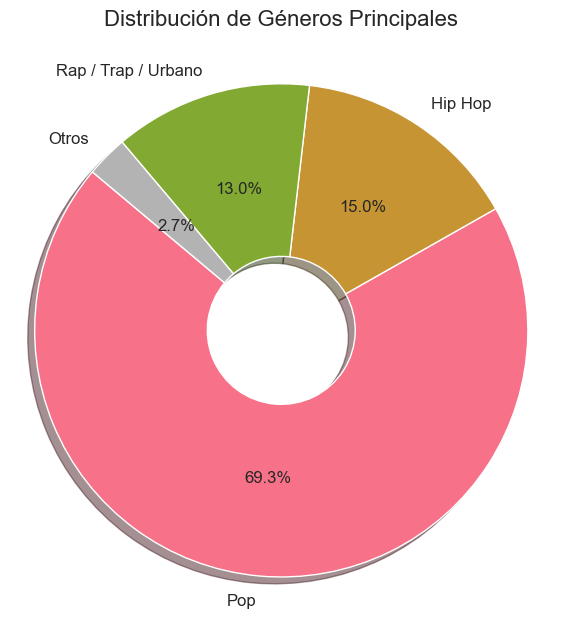

In [492]:
plt.figure(figsize=(7, 7))  # Aumentar el tamaño para una mejor legibilidad

# Obtener el recuento de géneros principales
main_genres_counts = df['Main Genre'].value_counts()

# Paleta de colores más desaturada y con colores contrastantes
colors = sns.color_palette('husl', n_colors=len(main_genres_counts))

# Umbral para agrupar las categorías más pequeñas en "Otros"
umbral = 0.03
small_genres = main_genres_counts[main_genres_counts / main_genres_counts.sum() < umbral]

# Crear una nueva serie con "Otros" y las categorías más pequeñas agrupadas
main_genres_counts_combined = main_genres_counts.copy()
main_genres_counts_combined['Otros'] = main_genres_counts[small_genres.index].sum()
main_genres_counts_combined = main_genres_counts_combined.drop(small_genres.index)

# Nombres específicos para las categorías principales
labels_combined = main_genres_counts_combined.index

# Paleta de colores actualizada con un color para "Otros"
colors_combined = colors[:len(main_genres_counts_combined) - 1] + [(0.7, 0.7, 0.7)]

# Crear el gráfico de pastel con colores mejorados, sombra y etiquetas más grandes
plt.pie(main_genres_counts_combined, 
        labels=labels_combined,  # Nombres específicos para las categorías principales
        autopct='%1.1f%%', 
        colors=colors_combined, 
        startangle=140, 
        shadow=True, 
        wedgeprops=dict(width=0.7, edgecolor='w'),
        textprops={'fontsize': 12})  # Ajustar el tamaño de la fuente de las etiquetas

# Ajustes adicionales para mejorar la legibilidad
plt.axis('equal')  # Relación de aspecto igual para asegurar que el pastel se dibuje como un círculo
plt.title('Distribución de Géneros Principales', fontsize=16, y=1.05)

# Mostrar el gráfico
plt.show()


Es evidente que el género POP es el más predominante, y esto se debe a su amplia amplitud conceptual. Muchas canciones clasificadas en géneros como hip-hop o urbano comparten también la clasificación de POP.

Es interesante destacar que, ya sea por casualidad o intencionalidad, el género POP tiende a ser el más bailable y comercial. Esta característica contribuye a su popularidad tanto en los Estados Unidos como en el resto del mundo. 

Específicamente en plataformas como Spotify, que atraen a un público amplio, se favorece la presencia del género POP. 

En este contexto, se puede apreciar que Spotify no está dirigido exclusivamente a melómanos o a sectores musicales segregados, sino que sirve como un canal popular que abarca una diversidad de gustos musicales.

In [493]:
def categorize_genre(genre):
    genre_upper = genre.upper()
    
    if 'HIP HOP' in genre_upper:
        return 'Hip Hop'
    elif 'LATIN' in genre_upper:
        return 'Latin'
    elif any(keyword in genre_upper for keyword in ['EDM', 'ELECTRO', 'ELECTRONIC']):
        return 'EDM Electro'  
    elif any(keyword in genre_upper for keyword in ['RAP', 'TRAP', 'URBANO','URBAN']):
        return 'Rap / Trap / Urbano'
    elif any(keyword in genre_upper for keyword in ['REGGAETON', 'REGGATEON FLOW']):
        return 'Reggaetón' 
    elif any(keyword in genre_upper for keyword in ['HOUSE', 'DANCE', 'FUNK']):
        return 'House / Dance / Funk'
    elif any(keyword in genre_upper for keyword in ['ROCK', 'INDIE', 'B&R','SOUL','COUNTRY','b&r']):
        return 'Rock / Indie / b&r / Country'
    elif 'POP' in genre_upper:
        return 'Pop'
    return 'Otros'

df['Main Genre'] = df['Genres'].apply(categorize_genre)

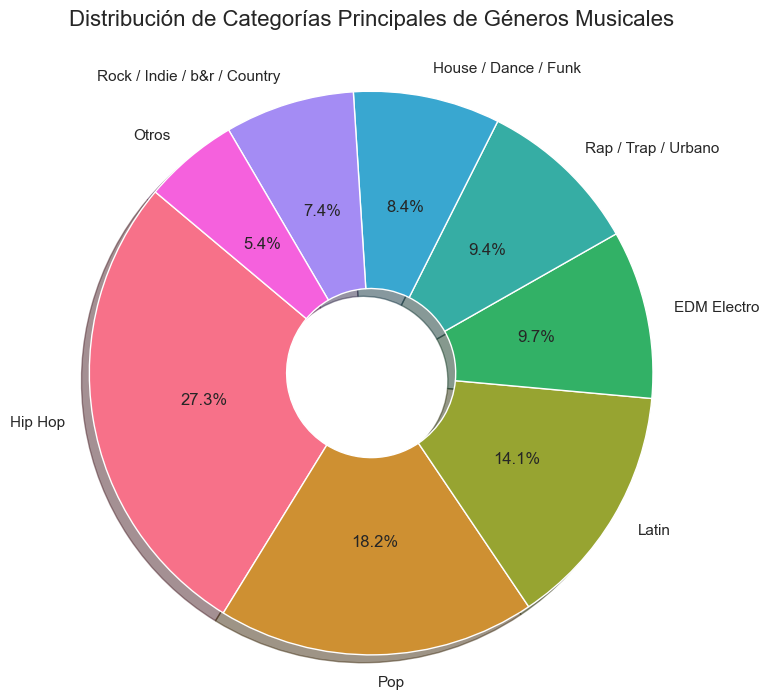

In [494]:
plt.figure(figsize=(8, 8))

# Obtener el recuento de géneros principales
genre_counts = df['Main Genre'].value_counts()

# Paleta de colores
colors = sns.color_palette('husl', n_colors=len(genre_counts))

# Crear el gráfico de quesito con colores mejorados y sombra
plt.pie(genre_counts, 
        labels=genre_counts.index, 
        autopct='%1.1f%%', 
        colors=colors, 
        startangle=140, 
        shadow=True, 
        wedgeprops=dict(width=0.7, edgecolor='w'))

# Ajustes adicionales para mejorar la legibilidad
plt.axis('equal')  # Relación de aspecto igual para asegurar que el pastel se dibuje como un círculo
plt.title('Distribución de Categorías Principales de Géneros Musicales', fontsize=16, y=1.05)

# Mostrar el gráfico
plt.show()


Al observar los datos, notamos que al restringir la categoría POP solo a casos donde no está mezclado con otros estilos, el porcentaje disminuye significativamente. En esta clasificación, hemos agrupado algunos estilos musicales de la siguiente manera:

- Rock, indie, country, y R&B.
- House, dance, y funk.
- Rap, trap, y urbano.
- En la categoría 'otros', incluimos principalmente géneros populares como sertanejo, arrocha, vallenato, rancheras, entre otros.

Esta agrupación nos proporciona una perspectiva sobre los estilos musicales secundarios. Sin embargo, es importante tener en cuenta que el género **POP sigue siendo el más común en Spotify** y el estilo con mayor audiencia en los Estados Unidos

In [495]:
otros_categories = set(df[df['Main Genre'] == 'Otros']['Genres'].apply(lambda x: str(x)))
print(otros_categories)

{"['arrocha', 'sertanejo', 'sertanejo universitario']", "['afrobeats', 'azonto']", "['reggae fusion']", "['mariachi', 'musica mexicana', 'ranchera']", 'Opera', "['aussietronica']", "['banda', 'musica mexicana', 'norteno', 'sad sierreno', 'sierreno']", "['vallenato', 'vallenato moderno']", "['agronejo', 'arrocha', 'sertanejo', 'sertanejo universitario']", "['arrocha', 'forro', 'sertanejo', 'sertanejo universitario']", "['hollywood']", "['ccm', 'worship']", "['sertanejo']", "['melbourne bounce']", "['opm']", "['movie tunes']", "['banda']"}


In [496]:
df.drop('Genres', axis=1, inplace=True)

In [497]:
df.head(2)

,Gender,Country,Popularity Artist,Followers,Artist Name,Artist Song Rank,Track Name,Album Name,Total Album Tracks,Is Explicit,Song Duration,Popularity Song,Main Genre
0,male,CA,95,83298497,Drake,1,IDGAF (feat. Yeat),For All The Dogs,23,True,260111,93,Hip Hop
1,male,CA,95,83298497,Drake,2,First Person Shooter (feat. J. Cole),For All The Dogs,23,True,247444,91,Hip Hop


In [498]:
df['Main Genre'].unique()

array(['Hip Hop', 'Rap / Trap / Urbano', 'Pop', 'Latin',
       'House / Dance / Funk', 'EDM Electro',
       'Rock / Indie / b&r / Country', 'Otros'], dtype=object)

In [499]:
df.describe().round(1)

,Popularity Artist,Followers,Artist Song Rank,Total Album Tracks,Song Duration,Popularity Song
count,4037.0,4037.0,4037.0,4037.0,4037.0,4037.0
mean,72.7,11442879.4,5.5,11.1,205170.7,69.0
std,9.8,16289974.5,2.9,8.5,50585.2,13.1
min,4.0,408.0,1.0,1.0,47354.0,0.0
25%,67.0,2151143.0,3.0,1.0,173419.0,62.0
50%,74.0,6310299.0,5.0,12.0,199746.0,71.0
75%,79.0,12117984.0,8.0,16.0,228000.0,78.0
max,100.0,115998928.0,10.0,165.0,682816.0,99.0


- En la cantidad de pistas en un álbum, aunque la mayoría de los datos se encuentran dentro del percentil 75% con alrededor de 16 pistas, existe un valor máximo que alcanza los 165. 

- Para abordar este comportamiento, planeo desagregar los valores y examinar más de cerca esta variabilidad. Esta desagregación permitirá identificar posibles valores atípicos y evaluar su impacto en la distribución general de los datos. 

- De esta manera, podré tomar medidas específicas, como la aplicación de técnicas de preprocesamiento o la exclusión de valores extremos, para mejorar la calidad y la interpretabilidad de los datos en relación con la cantidad de pistas en los álbumes.

In [500]:
df['Gender'].unique()

array(['male', 'female', 'mixed', 'other', nan], dtype=object)

- Saco una lista de las canciones en el Rank 1 de cada artista, ordenada por popularidad canción.

In [501]:
canciones_rank_1 = df[df['Artist Song Rank'] == 1]
canciones_rank_1_ordenadas = canciones_rank_1.sort_values(by='Popularity Song', ascending=False).head(20)
canciones_rank_1_ordenadas

,Gender,Country,Popularity Artist,Followers,Artist Name,Artist Song Rank,Track Name,Album Name,Total Album Tracks,Is Explicit,Song Duration,Popularity Song,Main Genre
3021,female,US,83,9597639,Mariah Carey,1,All I Want for Christmas Is You,Merry Christmas,10,False,241106,99,Rap / Trap / Urbano
550,female,US,100,95859165,Taylor Swift,1,Cruel Summer,Lover,18,False,178426,99,Pop
40,male,PR,95,77931484,Bad Bunny,1,PERRO NEGRO,nadie sabe lo que va a pasar mañana,22,True,162767,97,Latin
1753,male,CO,89,8720100,Feid,1,PERRO NEGRO,nadie sabe lo que va a pasar mañana,22,True,162767,97,Latin
1193,male,PR,85,13527025,Myke Towers,1,LALA,LA VIDA ES UNA,23,True,197920,95,Latin
70,female,US,88,95710972,Ariana Grande,1,Santa Tell Me,Santa Tell Me,1,False,204093,95,Pop
360,male,US,83,35223255,Marshmello,1,HARLEY QUINN,Pa las Baby's Y Belikeada,30,True,143327,95,EDM Electro
130,female,US,86,89957369,Billie Eilish,1,What Was I Made For? [From The Motion Picture ...,What Was I Made For? [From The Motion Picture ...,1,False,222369,94,Pop
110,male,CA,93,75945958,The Weeknd,1,"One Of The Girls (with JENNIE, Lily Rose Depp)",The Idol Episode 4 (Music from the HBO Origina...,3,False,244684,94,Pop
1073,male,GB,83,30523224,Harry Styles,1,As It Was,Harry's House,13,False,167303,94,Pop


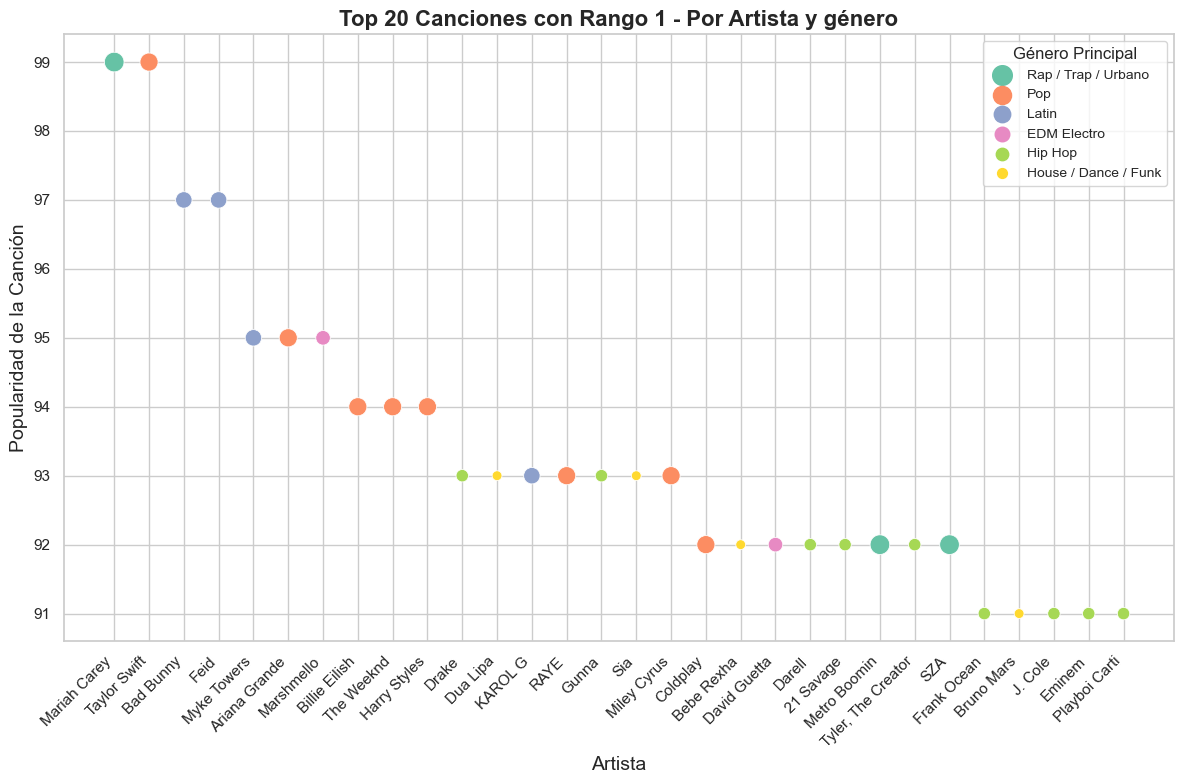

In [502]:
canciones_rank_1 = df[df['Artist Song Rank'] == 1]
top_20_canciones = canciones_rank_1.sort_values(by='Popularity Song', ascending=False).head(30)

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear el gráfico de burbujas para el top 30
plt.figure(figsize=(12, 8))
bubble_plot_top_20 = sns.scatterplot(x='Artist Name', y='Popularity Song', size='Main Genre', data=top_20_canciones, sizes=(50, 200), hue='Main Genre', palette='Set2')

# Estilizar el gráfico
bubble_plot_top_20.set_title('Top 20 Canciones con Rango 1 - Por Artista y género', fontsize=16, fontweight='bold')
bubble_plot_top_20.set_xlabel('Artista', fontsize=14)
bubble_plot_top_20.set_ylabel('Popularidad de la Canción', fontsize=14)

# Mostrar la leyenda en la esquina superior derecha
plt.legend(title='Género Principal', title_fontsize='12', fontsize='10', loc='upper right')

sizes_legend_labels = ['Tamaño Mínimo', '', '', '', '', 'Tamaño Máximo']
sizes_legend_values = [50, 80, 110, 140, 170, 200]

for i, (label, size) in enumerate(zip(sizes_legend_labels, sizes_legend_values), start=1):
    plt.scatter([], [], marker='o', color='white', s=size, label=f'{label} ({size})')

# Ajustes adicionales para los subgráficos
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas del eje x para mayor legibilidad
plt.tight_layout()
plt.show()

- Esta representación gráfica muestra las canciones clasificadas en el puesto número 1 de cada artista, del top 20 de canciones más populares.

- Proporciona una perspectiva detallada sobre la relación entre la popularidad de las canciones individuales y la posición general de los artistas en la escena musical.

- El tamaño de los puntos proporciona una representación visual de la magnitud de los valores en orden de máxima popularidad. Siendo la canción de Mariah Carey clasificada en 'urbano' la más popularen Taylor Swift en Pop la secundaria (punto algo más pequeño), etc...

- Es crucial tener en cuenta que, en algunos casos, el género musical asociado al artista, no es el de una canción específica. Como se evidencia, por ejemplo, en la canción de Navidad de Mariah Carey que, gana popularidad durante la temporada navideña de diciembre pero que no sería género musical urbano y en otras fechas no se reflejaría entre las canciones más escuchadas.

- Bad Bunny y Feid compiten con la misma canción, la cual ambos han posicionado en el puesto número 1 de su propio ranking. Y por eso la popularidad de la canción es la misma. 

- Al observar la gráfica, notamos que a medida que baja la popularidad de la canción, hay más cantidad de canciones. Esto sugiere que alcanzar un punto más alto en popularidad se vuelve más desafiante cuando ya se está en la cima. 

- También es interesante destacar que los géneros predominantes en las canciones con más popularidad son el pop y latino, mientras que los estilos de trap y hip hop parecen ser más secundarias.  

Es fundamental recordar que estas observaciones se basan en una única canción por artista. Esto explica la naturaleza escalonada de la gráfica, ya que representa la canción más popular de cada artista según su propio ranking.

Es por ese motivo que ahora procederé a mostrar una comparativa entre las gráficas de canciones menos populares versus las más populares, proporcionando una visión algo distinta.

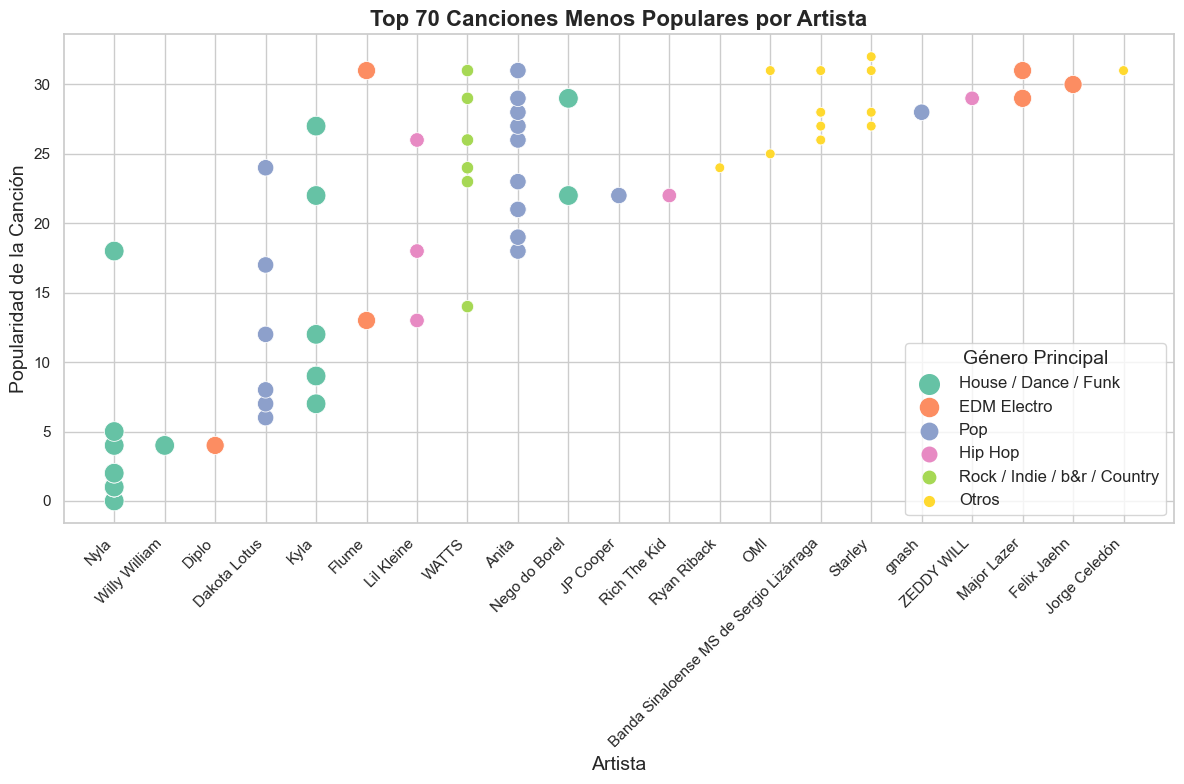

In [503]:
# Filtrar todas las canciones (sin importar el rango) y ordenar por popularidad de manera ascendente
canciones_menos_populares = df.sort_values(by='Popularity Song').head(70)

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear el gráfico de burbujas para las 50 canciones menos populares
plt.figure(figsize=(12, 8))
bubble_plot_menos_populares = sns.scatterplot(x='Artist Name', y='Popularity Song', size='Main Genre', data=canciones_menos_populares, sizes=(50, 200), hue='Main Genre', palette='Set2')

# Estilizar el gráfico
bubble_plot_menos_populares.set_title('Top 70 Canciones Menos Populares por Artista', fontsize=16, fontweight='bold')
bubble_plot_menos_populares.set_xlabel('Artista', fontsize=14)
bubble_plot_menos_populares.set_ylabel('Popularidad de la Canción', fontsize=14)

# Mostrar la leyenda en la esquina inferior derecha con un tamaño de fuente más grande
plt.legend(title='Género Principal', title_fontsize='14', fontsize='12', loc='lower right')

# Ajustes adicionales para los subgráficos
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas del eje x para mayor legibilidad
plt.tight_layout()
plt.show()



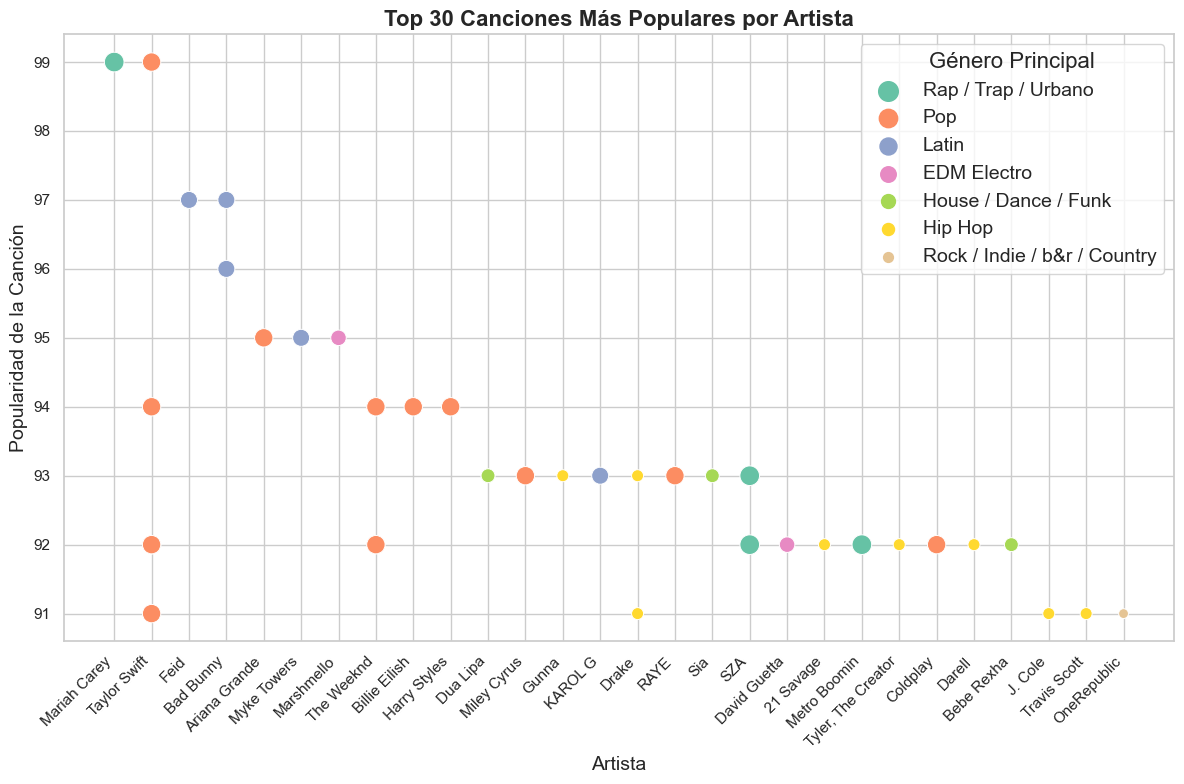

In [504]:
# Filtrar todas las canciones (sin importar el rango) y ordenar por popularidad de manera descendente
canciones_mas_populares = df.sort_values(by='Popularity Song', ascending=False).head(40)

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear el gráfico de burbujas para las 40 canciones más populares
plt.figure(figsize=(12, 8))
bubble_plot_mas_populares = sns.scatterplot(x='Artist Name', y='Popularity Song', size='Main Genre', data=canciones_mas_populares, sizes=(50, 200), hue='Main Genre', palette='Set2')

# Estilizar el gráfico
bubble_plot_mas_populares.set_title('Top 30 Canciones Más Populares por Artista', fontsize=16, fontweight='bold')
bubble_plot_mas_populares.set_xlabel('Artista', fontsize=14)
bubble_plot_mas_populares.set_ylabel('Popularidad de la Canción', fontsize=14)

# Mostrar la leyenda en la esquina superior derecha con un tamaño de fuente el doble de grande
plt.legend(title='Género Principal', title_fontsize='16', fontsize='14', loc='upper right')

# Ajustes adicionales para los subgráficos
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas del eje x para mayor legibilidad
plt.tight_layout()
plt.show()


- Es fascinante comparar estas dos gráficas: mientras que en las canciones menos populares tienden a pertenecer mayormente a un mismo artista, en el caso contrario, con las canciones más populares, esta tendencia no es tan evidente y se distribuyen de manera más equitativa entre varios artistas. Estamos analizando 70 canciones con poca popularidad que pertenecen a 20 artistas distintos Vs 30 canciones máxima popularidad que pertenecen a unos 20 .

- Los colores utilizados permiten identificar rápidamente los géneros a los que pertenecen las canciones más populares, destacando especialmente el **pop y el latino**.  Aunque al estar Mariah Carey en la primera posición el tamaño del punto de su género principal (no de la canción), es el mayor.

- En cambio, en el caso de las canciones menos populares, se observa una mayor diversidad de estilos, incluyendo hip hop, rock, y otros, aunque mezclados con el omnipresente pop que abarca todos los rangos de popularidad.

Esta comparación proporciona una visión interesante de cómo la distribución de popularidad y diversidad de artistas se manifiesta en las dos categorías de canciones.

- **Visualización de HISTOGRAMAS para observar si las variables numéricas tienen curva gausiana...**

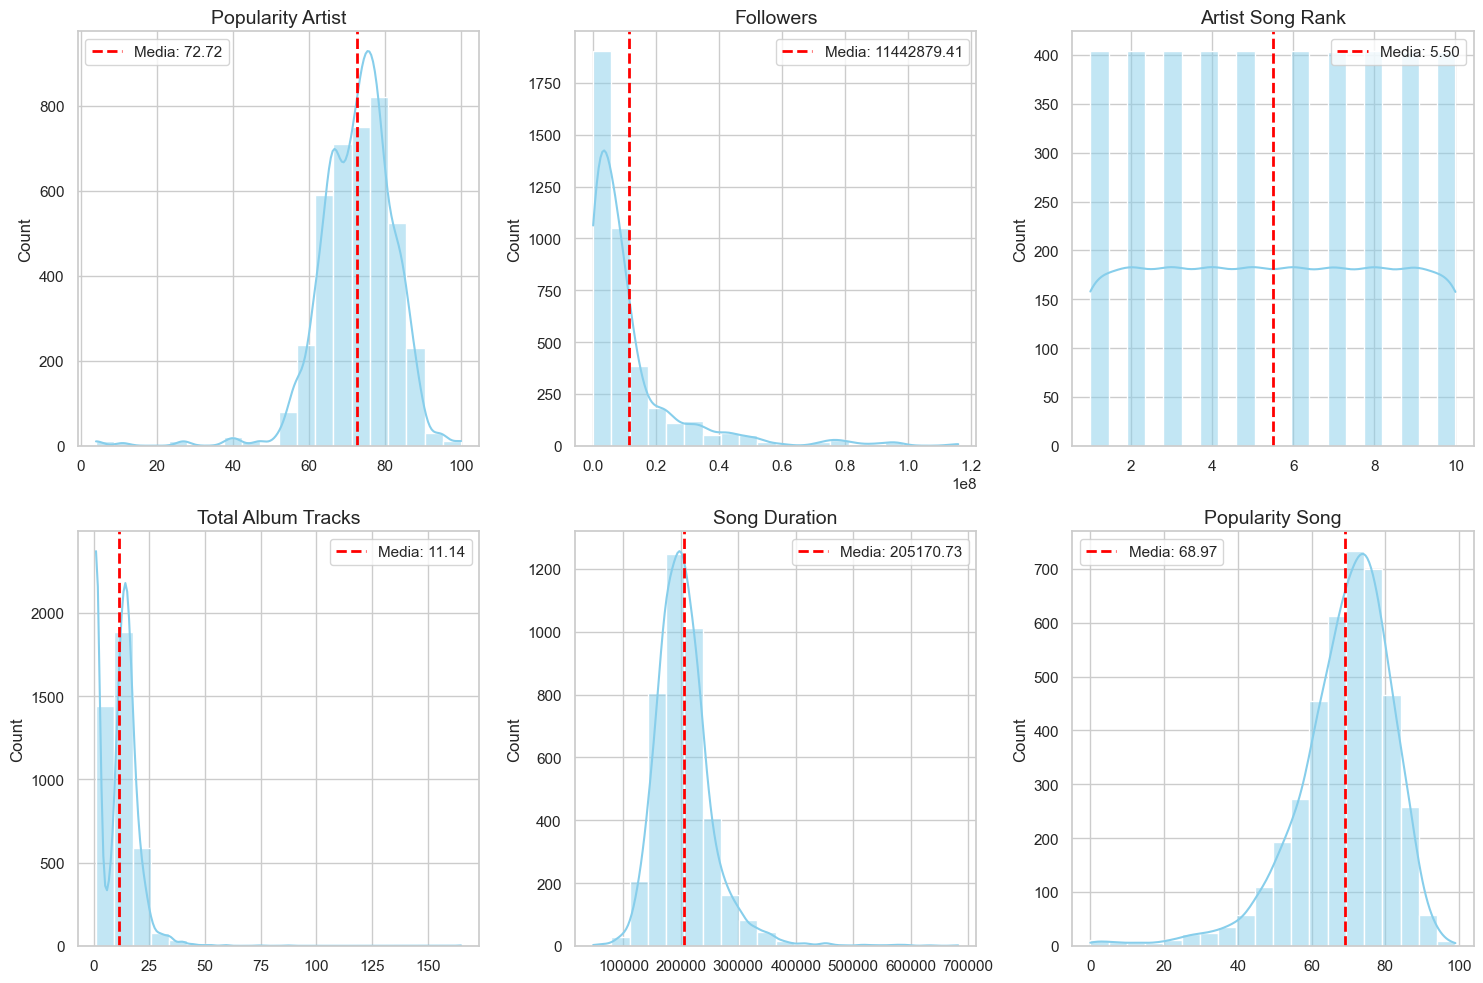

In [505]:
num_cols = ['Popularity Artist', 'Followers', 'Artist Song Rank', 'Total Album Tracks', 'Song Duration', 'Popularity Song']

# Configuración de estilo de Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))

# Histogramas utilizando Seaborn
for i, col in enumerate(num_cols):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[col], bins=20, kde=True, color='skyblue')
    
    # Agregar línea roja para la media
    mean_value = df[col].mean()
    plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Media: {mean_value:.2f}')
    
    plt.title(col, fontsize=14)
    plt.xlabel('')
    plt.legend()

# Ajustes de diseño
plt.tight_layout()
plt.show()


- Observamos que ninguna variable sigue una distribución normal. Y que artist song rank es tratada como una categórica puesto que define una posición ordinal del 1-10

- La asimetría y la falta de distribución normal en los datos suelen estar asociadas a la presencia de valores atípicos (colas de distribución a la derecha o izquierda del gráfico).

- Esto nos indica que es apropiado realizar un preprocesamiento adicional en los datos para abordar la asimetría antes de aplicar los modelos de machine learning, como la estandarización, normalización o la aplicación de transformaciones específicas.

- También será beneficioso aplicar transformaciones a los datos, como la raíz cuadrada o el logaritmo.

- Es importante tener en cuenta que, al elegir modelos, Random Forests o Gradient Boosted Trees son preferibles, ya que tienden a ser menos sensibles a la distribución de los datos en comparación con modelos lineales.

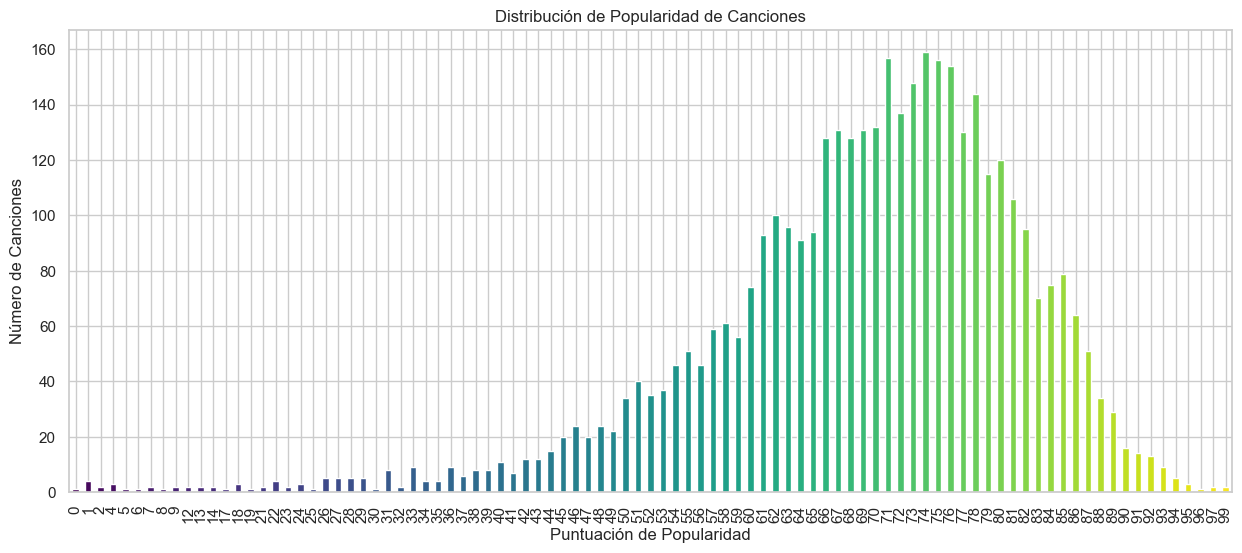

In [506]:
sns.set(style="whitegrid")

# Gráfico de barras para Popularity Song con ajustes visuales
plt.figure(figsize=(15, 6))
popularity_counts = df['Popularity Song'].value_counts().sort_index()
popularity_counts.plot(kind='bar', color=sns.color_palette("viridis", len(popularity_counts)))
plt.title('Distribución de Popularidad de Canciones')
plt.xlabel('Puntuación de Popularidad')
plt.ylabel('Número de Canciones')
plt.show()


- Destacamos que los picos más prominentes en la cantidad de canciones se encuentran en el rango de popularidad entre el 71% y el 78%. Esto sugiere que es relativamente común tener una popularidad moderada en comparación con los extremos de baja o alta popularidad.

- Además, observamos que obtener una baja puntuación de popularidad (a la izquierda de la gráfica) es más complicado que alcanzar una alta popularidad (a la derecha), lo que indica que mantenerse en la mediocridad puede ser más fácil que destacar excepcionalmente.

Es evidente que la audiencia tiende a ser más benevolente en sus calificaciones cuando no le gusta una canción, otorgando puntuaciones más altas. En cambio, obtener una puntuación cercana al rango más alto (97%) es un logro más desafiante y menos común.

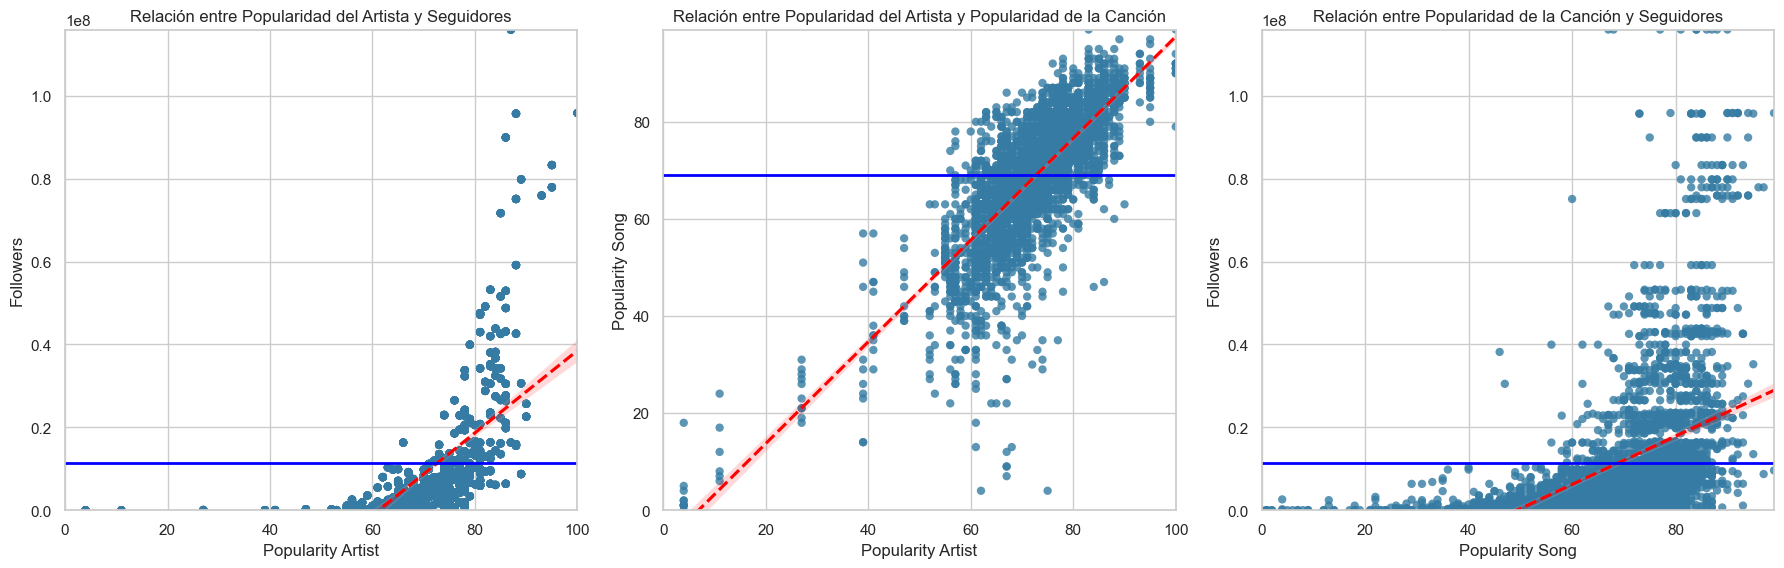

In [507]:
sns.set(style="whitegrid")

# Crear una figura con subgráficos
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
cmap = sns.color_palette('mako', as_cmap=True)

# Gráfico de dispersión para 'Popularity Artist' y 'Followers'
sns.regplot(x='Popularity Artist', y='Followers', data=df, ax=axs[0], scatter_kws={'color': cmap(0.5, alpha=0.5), 'edgecolor': 'none'}, line_kws={'color': 'red', 'linestyle': '--'})
axs[0].axhline(df['Followers'].mean(), color='blue', linestyle='-', linewidth=2)  # Línea horizontal para la media
axs[0].set_xlabel('Popularity Artist')
axs[0].set_ylabel('Followers')
axs[0].set_title('Relación entre Popularidad del Artista y Seguidores')
axs[0].set_xlim(left=0, right=df['Popularity Artist'].max())  # Limitar a valores no negativos en el eje x
axs[0].set_ylim(bottom=0, top=df['Followers'].max())  # Limitar a valores no negativos en el eje y

# Gráfico de dispersión para 'Popularity Artist' y 'Popularity Song'
sns.regplot(x='Popularity Artist', y='Popularity Song', data=df, ax=axs[1], scatter_kws={'color': cmap(0.5, alpha=0.5), 'edgecolor': 'none'}, line_kws={'color': 'red', 'linestyle': '--'})
axs[1].axhline(df['Popularity Song'].mean(), color='blue', linestyle='-', linewidth=2)  # Línea horizontal para la media
axs[1].set_xlabel('Popularity Artist')
axs[1].set_ylabel('Popularity Song')
axs[1].set_title('Relación entre Popularidad del Artista y Popularidad de la Canción')
axs[1].set_xlim(left=0, right=df['Popularity Artist'].max())  # Limitar a valores no negativos en el eje x
axs[1].set_ylim(bottom=0, top=df['Popularity Song'].max())  # Limitar a valores no negativos en el eje y

# Gráfico de dispersión para 'Popularity Song' y 'Followers'
sns.regplot(x='Popularity Song', y='Followers', data=df, ax=axs[2], scatter_kws={'color': cmap(0.5, alpha=0.5), 'edgecolor': 'none'}, line_kws={'color': 'red', 'linestyle': '--'})
axs[2].axhline(df['Followers'].mean(), color='blue', linestyle='-', linewidth=2)  # Línea horizontal para la media
axs[2].set_xlabel('Popularity Song')
axs[2].set_ylabel('Followers')
axs[2].set_title('Relación entre Popularidad de la Canción y Seguidores')
axs[2].set_xlim(left=0, right=df['Popularity Song'].max())  # Limitar a valores no negativos en el eje x
axs[2].set_ylim(bottom=0, top=df['Followers'].max())  # Limitar a valores no negativos en el eje y

plt.tight_layout()
plt.show()


- Es interesante observar la relación entre las variables y cómo afectan la popularidad de una canción. La correlación positiva entre la popularidad del artista, la popularidad de la canción y el número de seguidores es comprensible y podría deberse a la reputación y el alcance del artista, que naturalmente impactan en la recepción de sus canciones.

- Sin embargo, la cercanía menos evidente entre el número de seguidores y la popularidad de la canción podría indicar que la popularidad de una canción no está completamente determinada por la magnitud de la base de seguidores del artista. Aquí hay algunas interpretaciones y sugerencias para profundizar en este fenómeno

In [508]:
df['Is Explicit'] = df['Is Explicit'].astype('category')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4037 entries, 0 to 4036
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Gender              3987 non-null   object  
 1   Country             3558 non-null   object  
 2   Popularity Artist   4037 non-null   int64   
 3   Followers           4037 non-null   int64   
 4   Artist Name         4037 non-null   object  
 5   Artist Song Rank    4037 non-null   int64   
 6   Track Name          4037 non-null   object  
 7   Album Name          4037 non-null   object  
 8   Total Album Tracks  4037 non-null   int64   
 9   Is Explicit         4037 non-null   category
 10  Song Duration       4037 non-null   int64   
 11  Popularity Song     4037 non-null   int64   
 12  Main Genre          4037 non-null   object  
dtypes: category(1), int64(6), object(6)
memory usage: 382.6+ KB


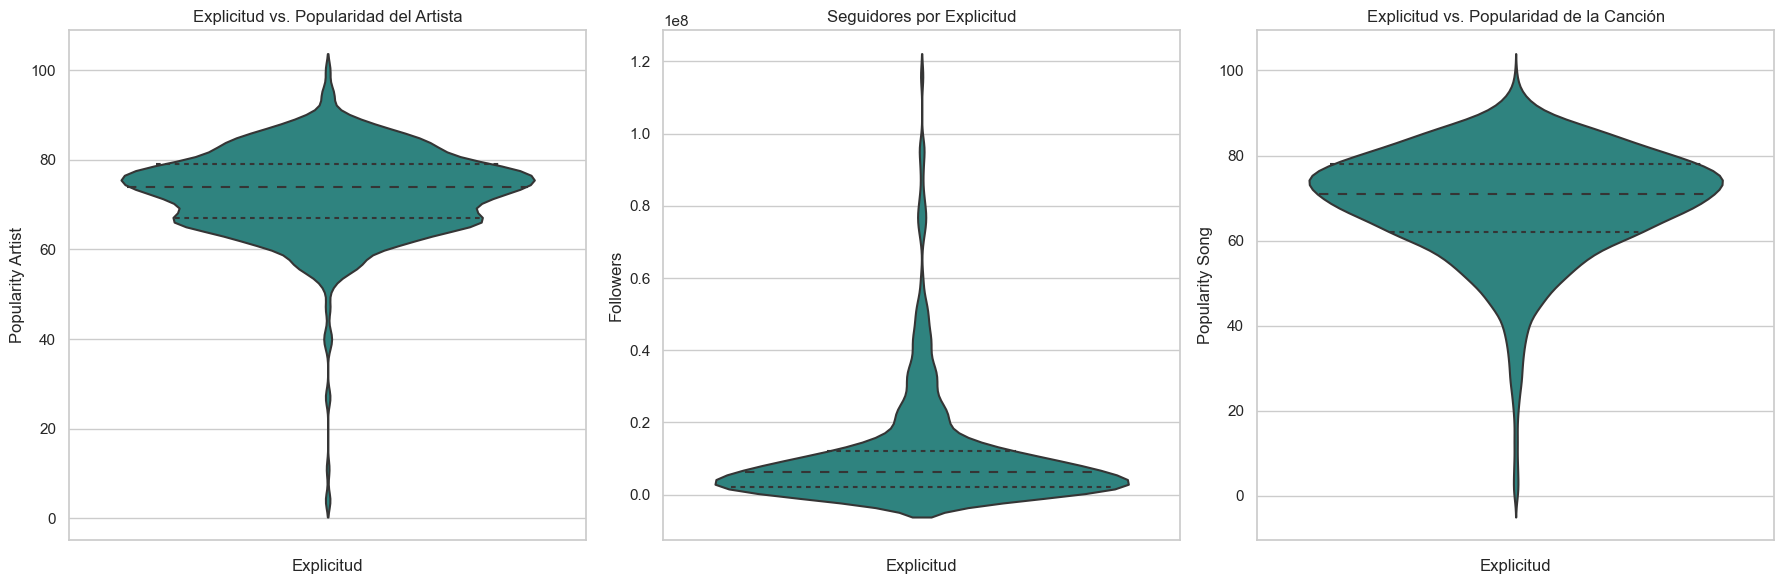

In [517]:
sns.set(style="whitegrid")

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Gráfico de violín para comparar la explicitud con la popularidad del artista
sns.violinplot(y='Popularity Artist', data=df, ax=axs[0], inner='quartile', palette='viridis', hue='Is Explicit', split=True)
axs[0].set_title('Explicitud vs. Popularidad del Artista')
axs[0].set_xlabel('Explicitud')
axs[0].set_ylabel('Popularity Artist')

# Gráfico de violín para comparar la explicitud con la cantidad de seguidores
sns.violinplot(y='Followers', data=df, ax=axs[1], inner='quartile', palette='viridis', hue='Is Explicit', split=True)
axs[1].set_title('Seguidores por Explicitud')
axs[1].set_xlabel('Explicitud')
axs[1].set_ylabel('Followers')

# Gráfico de violín para comparar la explicitud con la popularidad de la canción
sns.violinplot(y='Popularity Song', data=df, ax=axs[2], inner='quartile', palette='viridis', hue='Is Explicit', split=True)
axs[2].set_title('Explicitud vs. Popularidad de la Canción')
axs[2].set_xlabel('Explicitud')
axs[2].set_ylabel('Popularity Song')

# Ajustes de diseño
plt.tight_layout()
plt.show()


- Como podemos observar, el hecho de que un artista componga canciones con contenido explícito no parece aumentar necesariamente su popularidad. Lo mismo se aplica tanto al contenido explícito de la canción como al número de seguidores del artista. 

- De hecho, en el caso del número de seguidores ('Followers'), parece que la relación podría ser inversa, ya que hay artistas con menor popularidad que tienen un mayor número de seguidores. 

- Estos hallazgos sugieren que la popularidad de una canción y la cantidad de seguidores de un artista pueden depender de otros factores, y la presencia de contenido explícito no parece ser un impulsor significativo por sí solo.

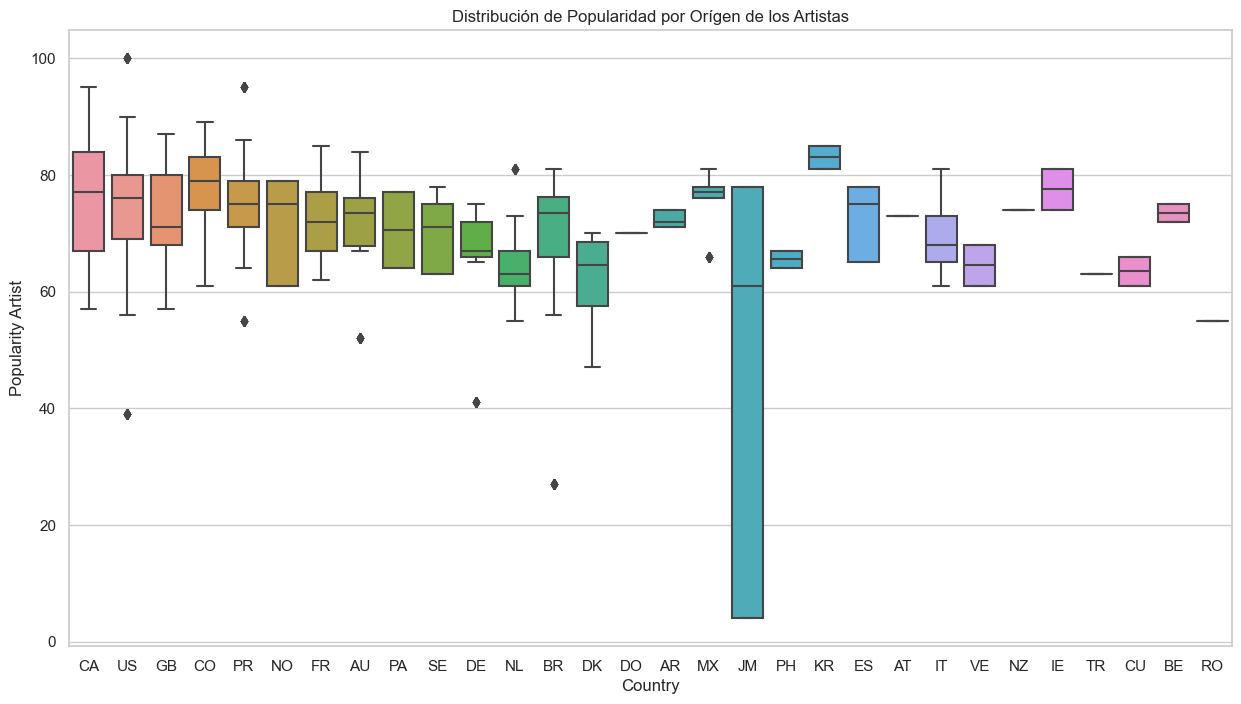

In [510]:
# visualizar la distribución de la popularidad de las canciones por país.
plt.figure(figsize=(15, 8))
sns.boxplot(x='Country', y='Popularity Artist', data=df)
plt.title('Distribución de Popularidad por Orígen de los Artistas')
plt.show()


Los países con el **rango más amplio** son Jamaica, Noruega y Canadá, donde al menos el 50% del conjunto se encuentra dentro de la caja (rango intercuartil). 
Los países con mayor rango, pero con más diversidad de datos, serían Canadá, Estados Unídos y por supuesto la categoría Otros. Donde contamos con más diversidad de artistas y en consecuencia con más diversidad de Popularidad.

Los países con **menos rango** son Austria (AT), República Dominicana (DO), Turquia (TR), Rumanía (RO) y Nueva Zelanda (NZ), contando con menos datos y por supuesto, con menos diversidad.

A nivel de Popularidad, los países que rozan el mayor índice de **Popularidad de sus artistas** son, Estados Unidos(US) en primer lugar, precedido por Canadá(CA) y Puerto Rico(PR) y los que comprenden 'Otros'.

Los países que contienen artistas de menor popularidad, son Jamaica (en el extremo inferior de amplio rango), precedido de algunos artistas de paises no clasificados ('otros') y Brasil (BR), precedido por Alemania (DE) y Estados Unidos (US)

**Corea del Sur (KR):** Con una popularidad media de 83, Corea del Sur destaca como un país donde las canciones tienen una alta valoración general. Sin embargo, hay que tener en cuenta que este resultado está influenciado por la presencia de solo dos artistas en el conjunto de datos.

**Otros Países (otros):** Esta categoría, que agrupa a países no clasificados o sin datos específicos, muestra una variabilidad significativa en la popularidad. Puede reflejar una diversidad de estilos y preferencias musicales, ya que abarca una amplia gama de valores de popularidad, desde artistas menos populares hasta artistas muy populares.

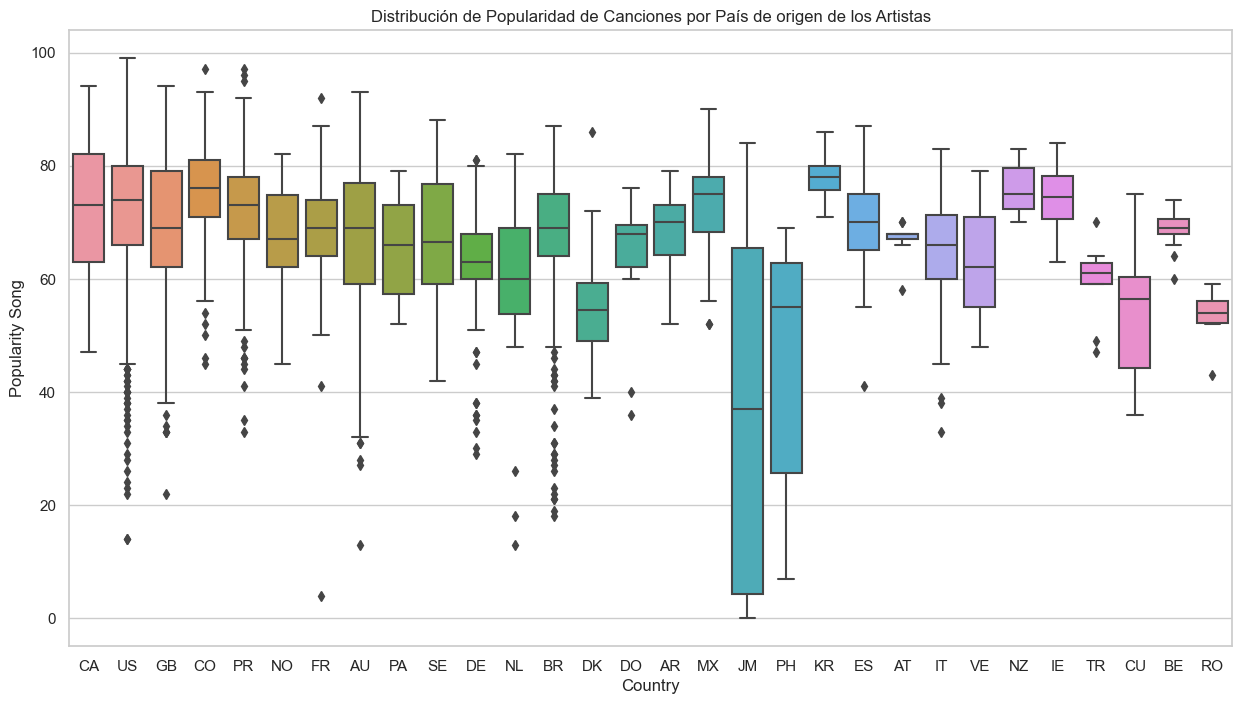

In [511]:
# visualizar la distribución de la popularidad de las canciones por país.
plt.figure(figsize=(15, 8))
sns.boxplot(x='Country', y='Popularity Song', data=df)
plt.title('Distribución de Popularidad de Canciones por País de origen de los Artistas')
plt.show()


Los países que tienen un **rango más amplio**, en la popularidad de sus canciones, tomando en cuenta al menos el 95% de los datos son los que están clasificados en 'Otros', Francia (FR), Estados Unidos (US) y Jamaica (JM).

Austria(AT), Nueva zelanda(NZ) y Belgica(BE) serían en este caso los países con el **rango más estrecho**, precedido por Rumanía (RO) y Korea del Sur (KR).

Corea del Sur (KR) destaca por tener la **mediana más elevada** en relación a la popularidad de canciones, sugiriendo que la mayoría de las canciones en este país tienden a ser altamente populares. Precedido por Méjico (MX), Colombia (CO), Nueva Zelanda (NZ) y Irlanda (IE) con valores muy parecidos.

La **mediana más baja** la tiene Jamaica, al igual que nos pasó en popularidad de los artistas, precedida por Dinamarca (DK) y Filipinas (PH).

Puerto Rico (PR) muestra una cantidad significativa de **outliers superiores**, indicando algunas canciones excepcionalmente populares en comparación con el resto del país.

En la categoría 'Otros', obtenemos muchos **outliers** en popularidad baja, puesto que es una columna que contiene artistas procedentes de diferentes países. Francia(FR), Australia(AU), Estados Unidos(US) y Holanda (NL) tienen alguna canción con muy baja popularidad, siendo en Francia(FR), un caso bastante atípico en relación a la popularidad de sus otras canciones.

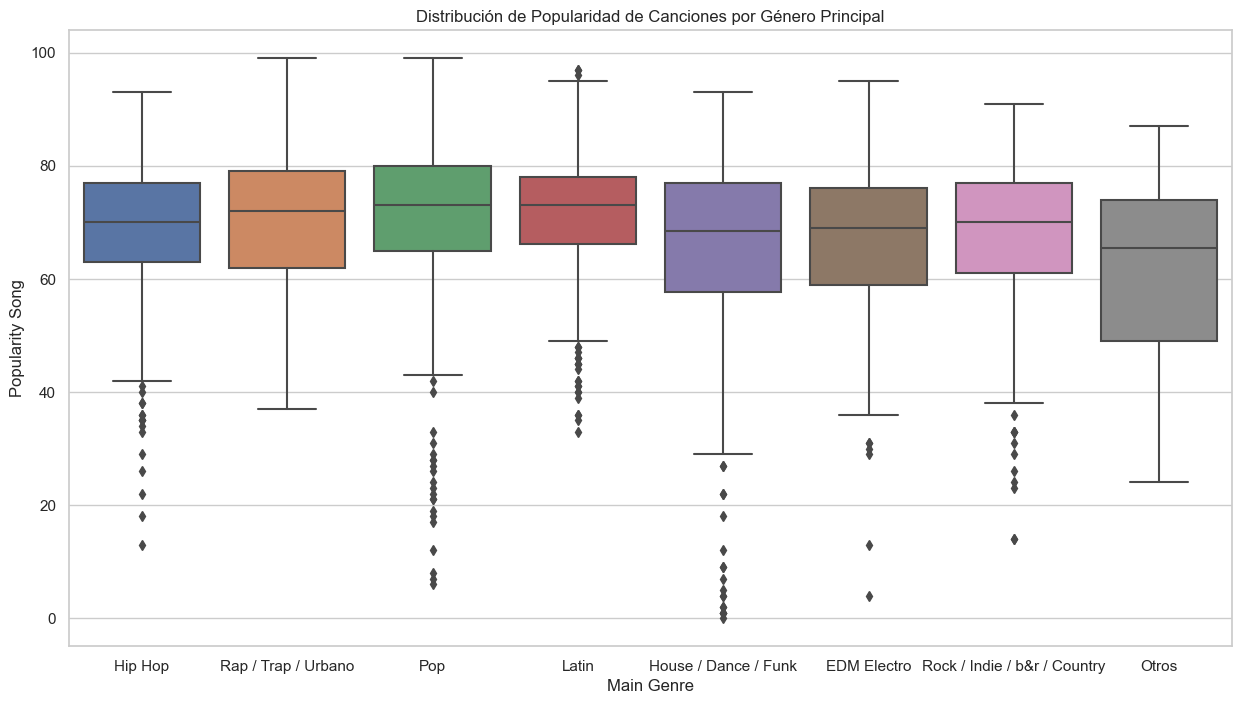

In [512]:
# visualizar la distribución de la popularidad de las canciones por país.
plt.figure(figsize=(15, 8))
sns.boxplot(x='Main Genre', y='Popularity Song', data=df)
plt.title('Distribución de Popularidad de Canciones por Género Principal')
plt.show()

Las canciones de estilos musicales 'Latin' y 'Pop', nos muestra la **mediana más alta**, sugiriendo que al menos un 50% de sus canciones, tienen una popularidad igual o superior a esta. 
Por lo contrario, y con diferencia significativa, los estilos de la categoría 'otros' son los que tienen la **mediana más baja** y con ello, situa al menos la mitad de sus canciones, en valores inferiores a la mediana.

La presencia de valores extremos en varios géneros sugiere la existencia de canciones excepcionales que se destacan en términos de popularidad.

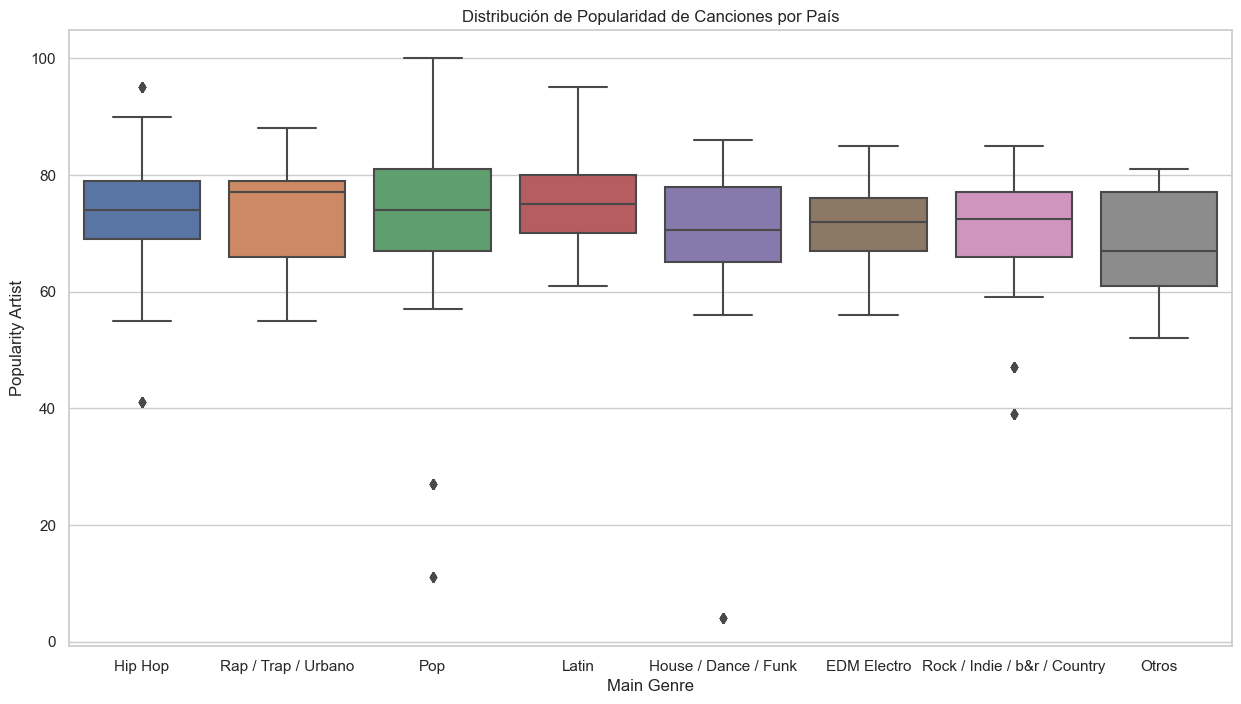

In [513]:
# visualizar la distribución de la popularidad de las canciones por país.
plt.figure(figsize=(15, 8))
sns.boxplot(x='Main Genre', y='Popularity Artist', data=df)
plt.title('Distribución de Popularidad de Canciones por País')
plt.show()

- Los boxplots revelan resultados bastante homogéneos en cuanto a la popularidad de artistas, aunque se observan más valores atípicos en los géneros de Pop, Rock y Hip Hop.
- En el género Pop, se abarcan tanto valores máximos como mínimos relativamente bajos, indicando una diversidad considerable en la popularidad de los artistas de este género.
- Para Hip Hop y Rock, se identifican algunos valores atípicos en la parte inferior de la escala de popularidad, lo que sugiere que estos géneros tienden a tener una concentración más alta de artistas con - niveles moderados a altos de popularidad.
- En el género House, se observa algun valor atípico con popularidad excepcionalmente baja.
- Las medianas de la popularidad se mantienen consistentemente altas, siendo los artistas clasificados en el género Rap/Trap/Urbano los que tienen la mediana más alta, seguido por los artistas asociados el género Latino.

In [514]:
columnas_numericas = df.select_dtypes(include=['number'])
columnas_categóricas = df.select_dtypes(include=['object'])
print("Columnas Numéricas:")
print(columnas_numericas.columns)
print("\nColumnas Categóricas:")
print(columnas_categóricas.columns)

Columnas Numéricas:
Index(['Popularity Artist', 'Followers', 'Artist Song Rank',
       'Total Album Tracks', 'Song Duration', 'Popularity Song'],
      dtype='object')

Columnas Categóricas:
Index(['Gender', 'Country', 'Artist Name', 'Track Name', 'Album Name',
       'Main Genre'],
      dtype='object')


Antes de realizar la estandarización, realizamos un Boxplot para detectar los Outliers (valores atípicos) y de este modo eligir el modelo a aplicar.

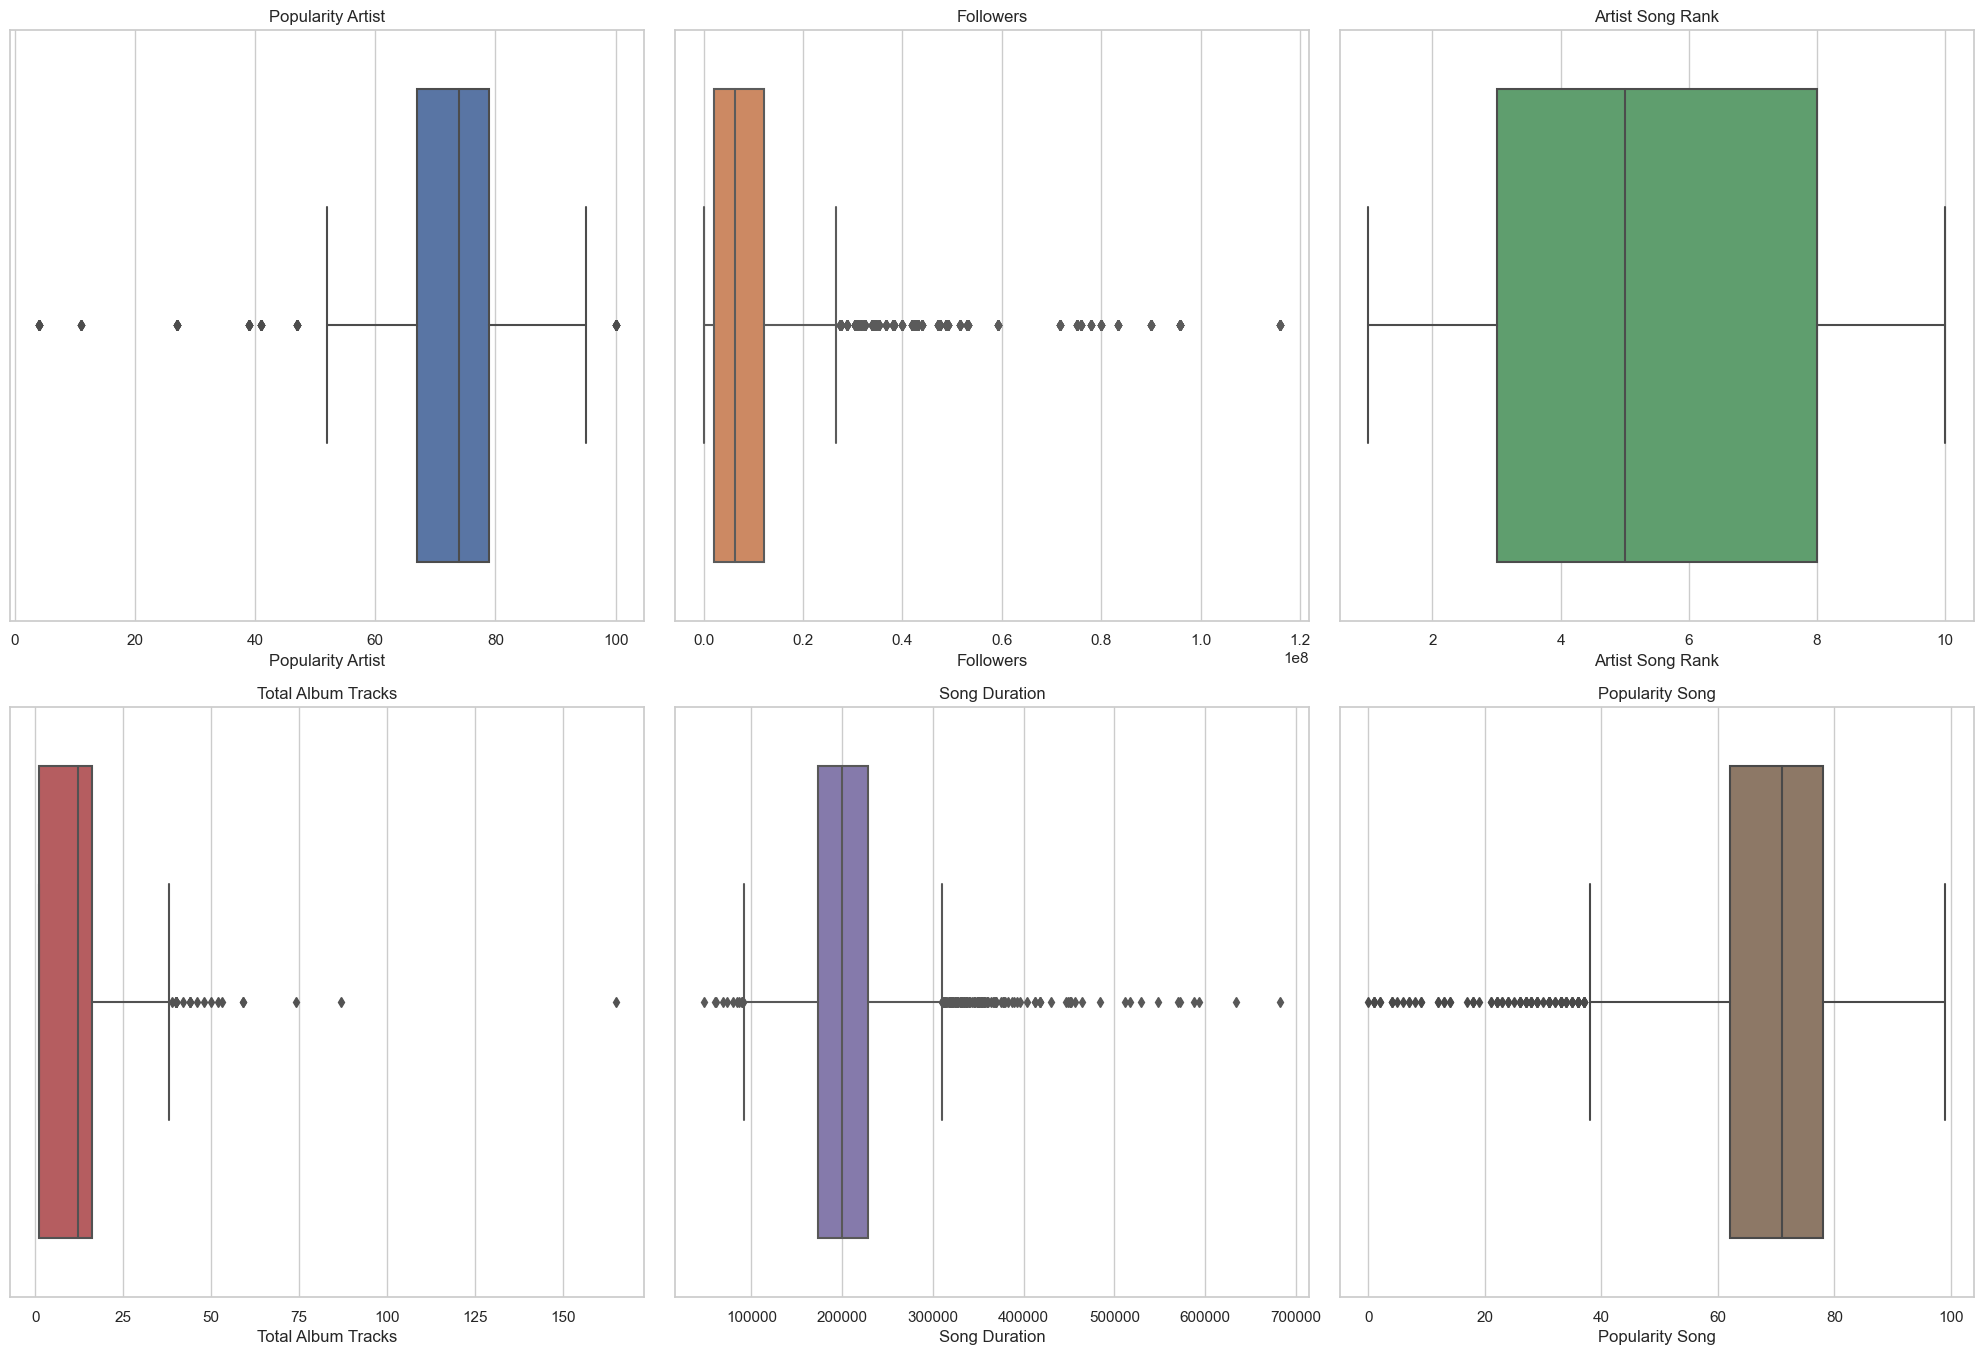

In [515]:
df_col_num = df.select_dtypes(include='number')

plt.figure(figsize=(20, 20))
palette = sns.color_palette("deep", n_colors=len(columnas_numericas.columns))
num_columns = 3

for i, column in enumerate(df_col_num .columns):
    plt.subplot((len(columnas_numericas.columns) // num_columns) + 1, num_columns, i + 1)
    sns.boxplot(x=columnas_numericas[column], orient="h", color=palette[i])
    plt.title(f'{column}')
    plt.tight_layout()

plt.show()

- Todas tienen outliers a excepcion de artist song rank, puesto que se tratará como categórica. (Es ordinal y no respondería a un valor numérico en los estúdios).

In [516]:
df.to_csv('df.csv', index=False)

Una vez presentado el análisis exhaustivo de datos, procedemos al preprocesamiento de los mismos y uso de alogaritmos de Machine Learning, con el archivo (3_Preprocessing_ML).